In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.ensemble import RandomForestClassifier



In [3]:
file_path = '/content/drive/My Drive/dataset/american_bankruptcy.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467  

[5 rows x 21 columns]

In [5]:
df.shape

(78682, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

Renaming the columns to match with the corresponding details on the meta data sheet

In [7]:
df.rename(columns={
    'X1': 'current_assets',
    'X2': 'cost_of_goods_sold',
    'X3': 'depreciation_amort',
    'X4': 'ebitda',
    'X5': 'inventory',
    'X6': 'net_income',
    'X7': 'total_receivables',
    'X8': 'market_value',
    'X9': 'net_sales',
    'X10': 'total_assets',
    'X11': 'long_term_debt',
    'X12': 'ebit',
    'X13': 'gross_profit',
    'X14': 'current_liabilities',
    'X15': 'retained_earnings',
    'X16': 'total_revenue',
    'X17': 'total_liabilities',
    'X18': 'operating_expenses'
}, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         78682 non-null  object 
 1   status_label         78682 non-null  object 
 2   year                 78682 non-null  int64  
 3   current_assets       78682 non-null  float64
 4   cost_of_goods_sold   78682 non-null  float64
 5   depreciation_amort   78682 non-null  float64
 6   ebitda               78682 non-null  float64
 7   inventory            78682 non-null  float64
 8   net_income           78682 non-null  float64
 9   total_receivables    78682 non-null  float64
 10  market_value         78682 non-null  float64
 11  net_sales            78682 non-null  float64
 12  total_assets         78682 non-null  float64
 13  long_term_debt       78682 non-null  float64
 14  ebit                 78682 non-null  float64
 15  gross_profit         78682 non-null 

In [9]:
df.isnull().sum()


company_name           0
status_label           0
year                   0
current_assets         0
cost_of_goods_sold     0
depreciation_amort     0
ebitda                 0
inventory              0
net_income             0
total_receivables      0
market_value           0
net_sales              0
total_assets           0
long_term_debt         0
ebit                   0
gross_profit           0
current_liabilities    0
retained_earnings      0
total_revenue          0
total_liabilities      0
operating_expenses     0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(0)

## EDA

In [11]:
df1 = df.copy()

In [12]:
df1.describe(include='all')

company_name status_label          year  current_assets  \
count         78682        78682  78682.000000    78682.000000   
unique         8971            2           NaN             NaN   
top            C_17        alive           NaN             NaN   
freq             20        73462           NaN             NaN   
mean            NaN          NaN   2007.506317      880.362485   
std             NaN          NaN      5.742768     3928.564794   
min             NaN          NaN   1999.000000       -7.760000   
25%             NaN          NaN   2002.000000       18.924000   
50%             NaN          NaN   2007.000000      100.449500   
75%             NaN          NaN   2012.000000      431.526750   
max             NaN          NaN   2018.000000   169662.000000   

        cost_of_goods_sold  depreciation_amort        ebitda     inventory  \
count         78682.000000        78682.000000  78682.000000  78682.000000   
unique                 NaN                 NaN           NaN           NaN   
top                    NaN                 NaN           NaN           NaN   
freq                   NaN                 NaN           NaN           NaN   
mean           1594.529029          121.234256    376.759424    201.605717   
std            8930.484664          652.376804   2012.023142   1060.766096   
min            -366.645000            0.000000 -21913.000000      0.000000   
25%              17.038250            1.192000     -0.811000      0.000000   
50%             103.661000            7.929500     15.034500      7.023000   
75%             634.548000           47.971750    139.655250     74.747250   
max          374623.000000        28430.000000  81730.000000  62567.000000   

           net_income  total_receivables  ...      net_sales   total_assets  \
count    78682.000000       78682.000000  ...   78682.000000   78682.000000   
unique            NaN                NaN  ...            NaN            NaN   
top               NaN                NaN  ...            NaN            NaN   
freq              NaN                NaN  ...            NaN            NaN   
mean       129.382453         286.832743  ...    2364.019706    2867.110620   
std       1265.532022        1335.978571  ...   11950.068842   12917.944421   
min     -98696.000000          -0.006000  ...   -1964.999000       0.001000   
25%         -7.415750           3.281250  ...      27.548500      37.363500   
50%          1.616000          22.820000  ...     186.598500     213.203500   
75%         40.144250         131.580500  ...    1046.402500    1171.364750   
max     104821.000000       65812.000000  ...  511729.000000  531864.000000   

        long_term_debt          ebit   gross_profit  current_liabilities  \
count     78682.000000  78682.000000   78682.000000         78682.000000   
unique             NaN           NaN            NaN                  NaN   
top                NaN           NaN            NaN                  NaN   
freq               NaN           NaN            NaN                  NaN   
mean        722.483710    255.525035     769.490783           610.072255   
std        3242.170946   1494.643534    3774.703114          2938.387443   
min          -0.023000 -25913.000000  -21536.000000             0.001000   
25%           0.000000     -2.787000       8.521250             8.889250   
50%           7.593500      6.518000      63.581500            43.333000   
75%         248.760750     87.599000     344.074250           222.817000   
max      166250.000000  71230.000000  137106.000000        116866.000000   

        retained_earnings  total_revenue  total_liabilities  \
count        78682.000000   78682.000000       78682.000000   
unique                NaN            NaN                NaN   
top                   NaN            NaN                NaN   
freq                  NaN            NaN                NaN   
mean           532.467069    2364.019706        1773.563963   
std           6369.159440   11950.068

There are some negative values in cost of goods sold and total receivables. These are very unlikely as a negative cost of goods sold can indicate that a companuy is paid to poduce products. For this analysis, we shall consider these as outliers and remove from dataset

In [13]:



df1 = df1[~(
    (df1['cost_of_goods_sold'] < 0) |
    (df1['total_receivables'] < 0) |
    (df1['current_assets'] < 0)
)]



In [14]:
df1.describe(include='all')

company_name status_label          year  current_assets  \
count         78670        78670  78670.000000    78670.000000   
unique         8971            2           NaN             NaN   
top            C_17        alive           NaN             NaN   
freq             20        73452           NaN             NaN   
mean            NaN          NaN   2007.505834      880.495712   
std             NaN          NaN      5.742659     3928.849594   
min             NaN          NaN   1999.000000        0.001000   
25%             NaN          NaN   2002.000000       18.932000   
50%             NaN          NaN   2007.000000      100.475000   
75%             NaN          NaN   2012.000000      431.757000   
max             NaN          NaN   2018.000000   169662.000000   

        cost_of_goods_sold  depreciation_amort        ebitda     inventory  \
count         78670.000000        78670.000000  78670.000000  78670.000000   
unique                 NaN                 NaN           NaN           NaN   
top                    NaN                 NaN           NaN           NaN   
freq                   NaN                 NaN           NaN           NaN   
mean           1594.777288          121.251863    376.811334    201.636350   
std            8931.143046          652.424975   2012.171686   1060.844096   
min               0.000000            0.000000 -21913.000000      0.000000   
25%              17.056250            1.192250     -0.810000      0.000000   
50%             103.704500            7.934000     15.045000      7.030000   
75%             634.614750           47.985750    139.698250     74.787250   
max          374623.000000        28430.000000  81730.000000  62567.000000   

           net_income  total_receivables  ...      net_sales   total_assets  \
count    78670.000000       78670.000000  ...   78670.000000   78670.000000   
unique            NaN                NaN  ...            NaN            NaN   
top               NaN                NaN  ...            NaN            NaN   
freq              NaN                NaN  ...            NaN            NaN   
mean       129.401443         286.876221  ...    2364.378435    2867.528842   
std       1265.627568        1336.075821  ...   11950.944919   12918.884842   
min     -98696.000000           0.000000  ...   -1964.999000       0.001000   
25%         -7.415750           3.284000  ...      27.556750      37.381500   
50%          1.618000          22.826500  ...     186.681000     213.268500   
75%         40.148750         131.625250  ...    1046.637500    1171.583750   
max     104821.000000       65812.000000  ...  511729.000000  531864.000000   

        long_term_debt          ebit   gross_profit  current_liabilities  \
count     78670.000000  78670.000000   78670.000000         78670.000000   
unique             NaN           NaN            NaN                  NaN   
top                NaN           NaN            NaN                  NaN   
freq               NaN           NaN            NaN                  NaN   
mean        722.589723    255.559338     769.601253           610.162452   
std        3242.406761   1494.754412    3774.980064          2938.602404   
min          -0.023000 -25913.000000  -21536.000000             0.001000   
25%           0.000000     -2.784000       8.527250             8.894750   
50%           7.598500      6.520500      63.609500            43.350000   
75%         248.799750     87.622500     344.097250           222.898250   
max      166250.000000  71230.000000  137106.000000        116866.000000   

        retained_earnings  total_revenue  total_liabilities  \
count        78670.000000   78670.000000       78670.000000   
unique                NaN            NaN                NaN   
top                   NaN            NaN                NaN   
freq                  NaN            NaN                NaN   
mean           532.562300    2364.378435        1773.824378   
std           6369.640284   11950.944

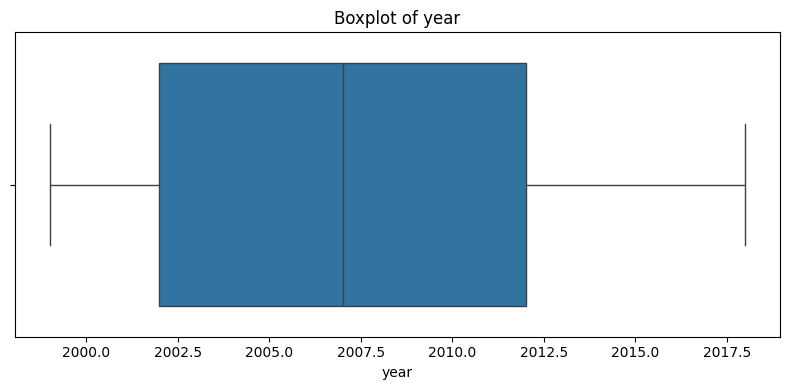

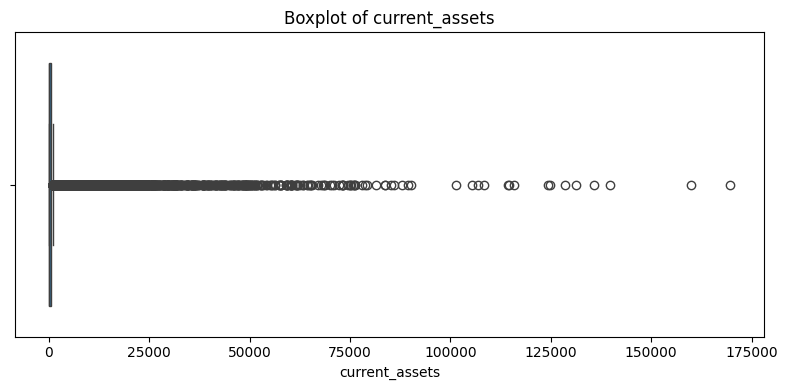

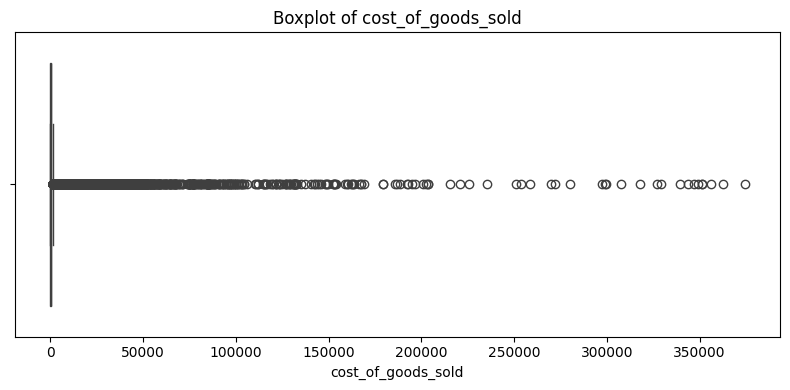

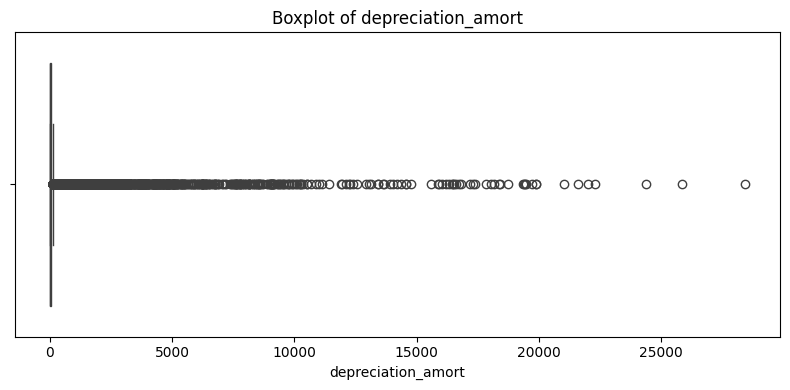

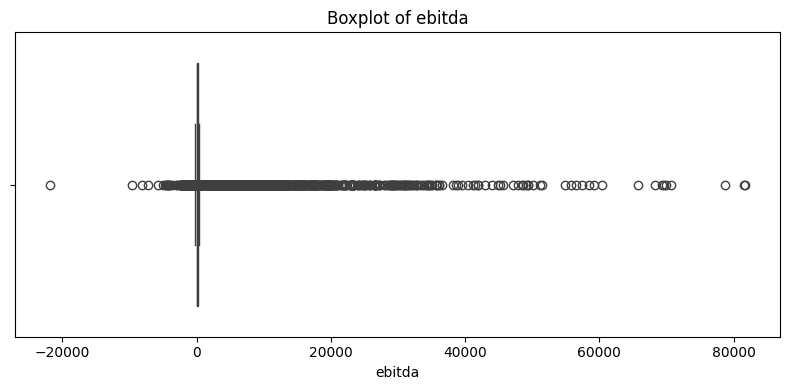

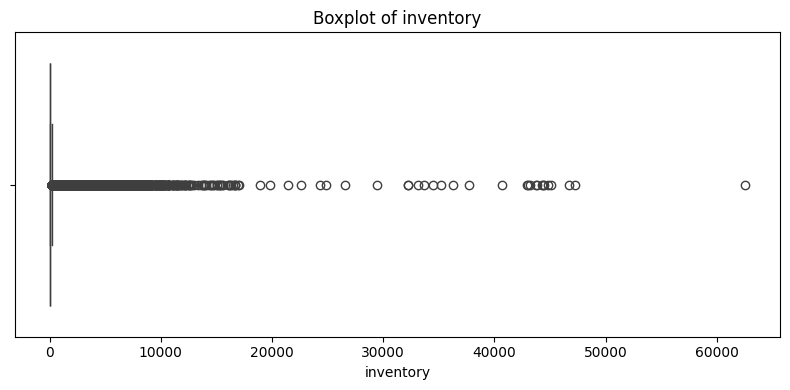

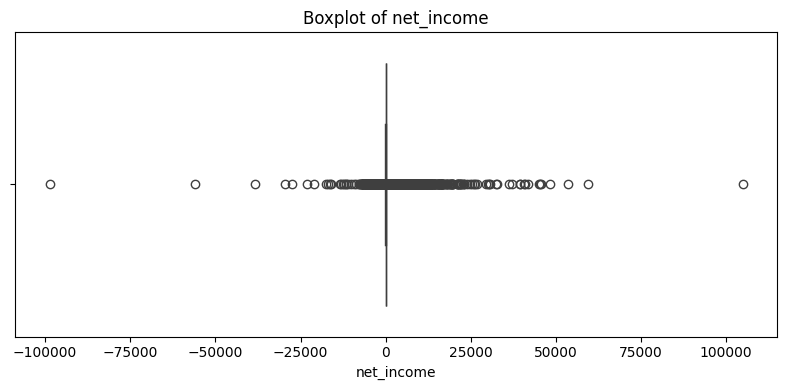

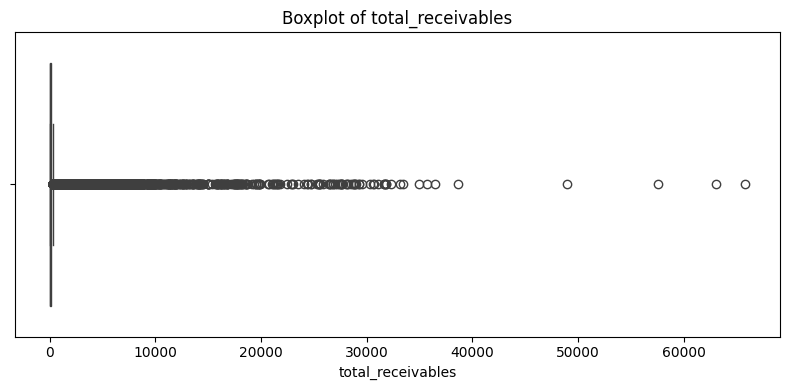

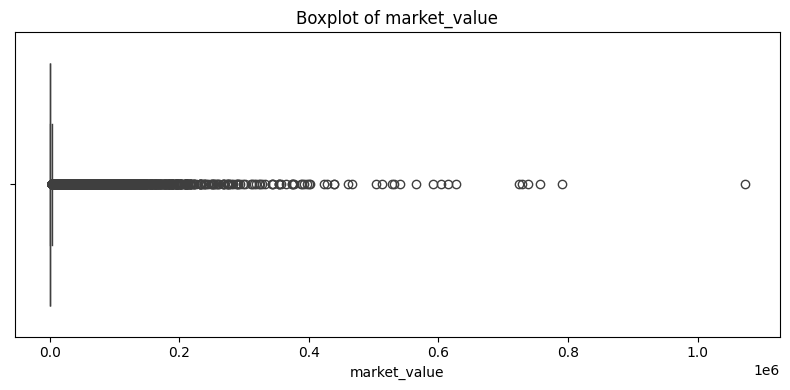

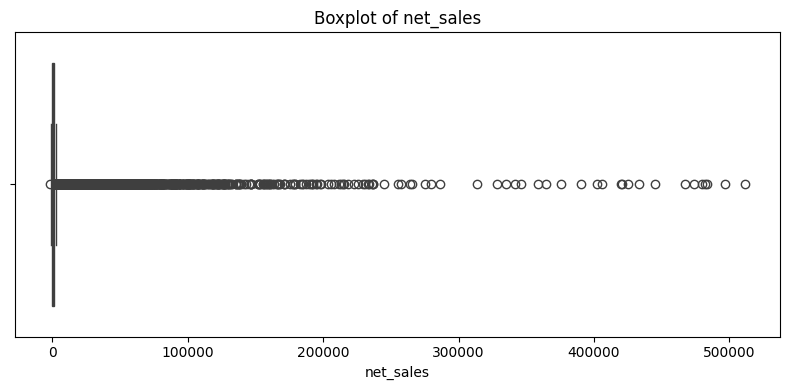

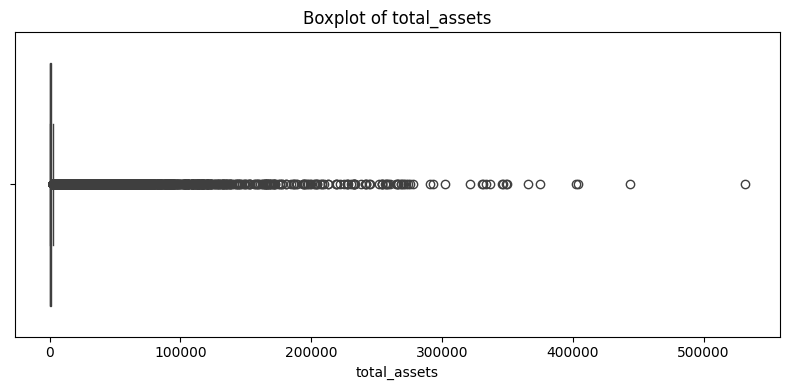

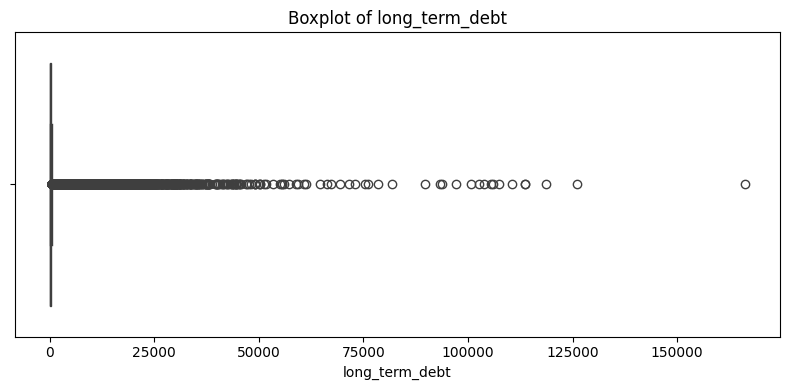

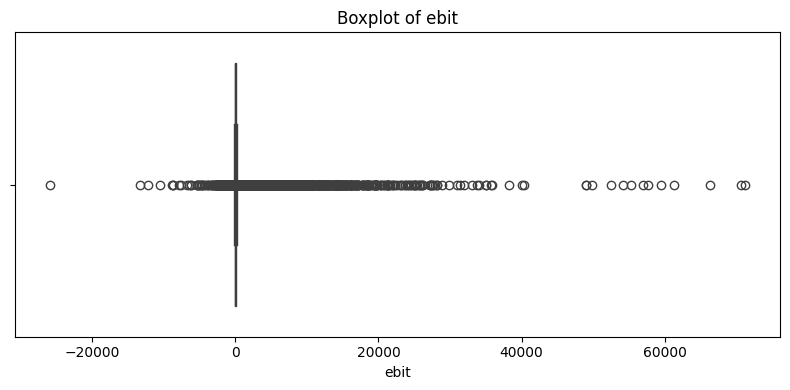

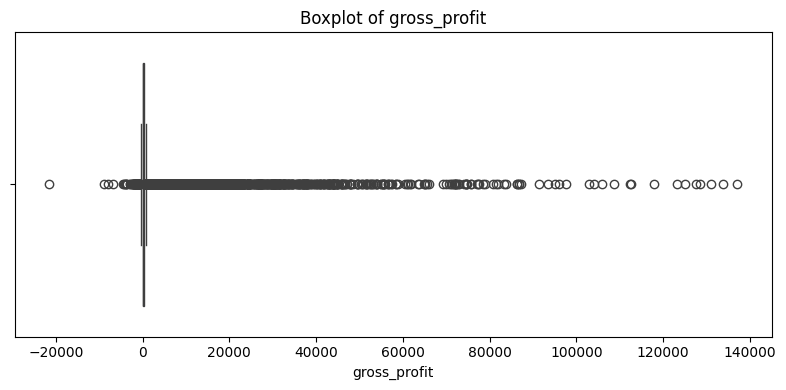

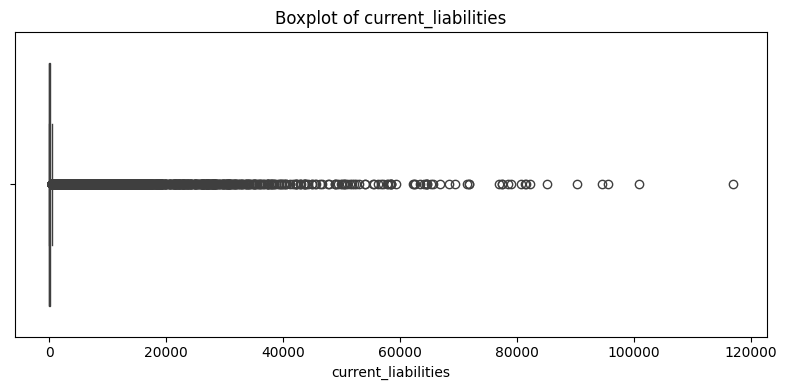

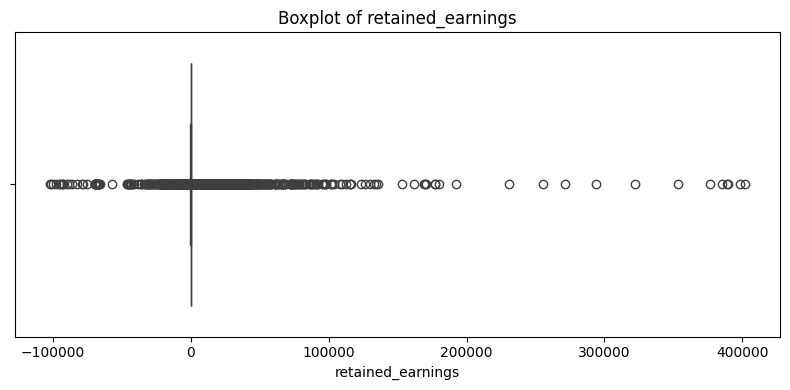

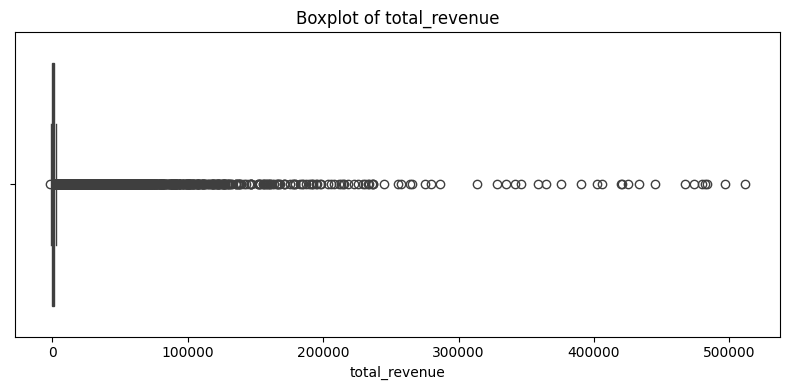

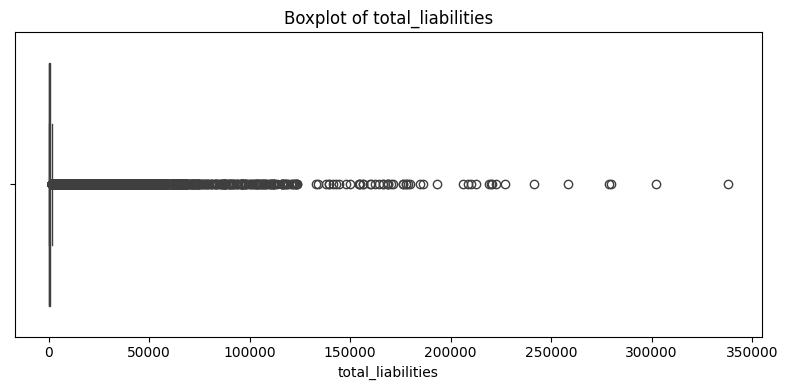

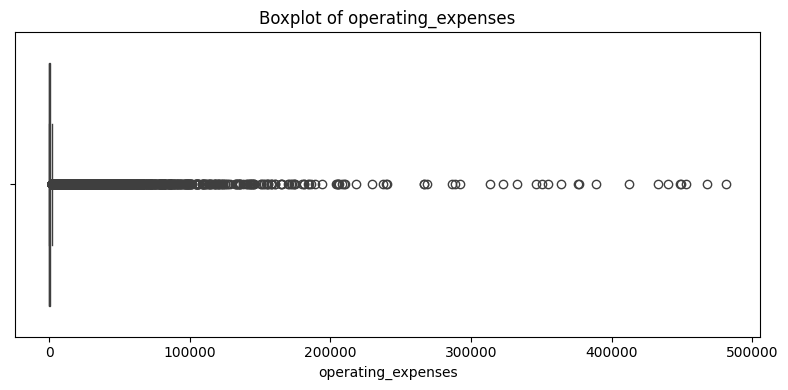

In [15]:
# Select numeric columns only
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Loop through each column and plot
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [16]:
# using z score to remove outliers

from scipy.stats import zscore

# Select only numeric columns
numeric_cols = df1.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores and take absolute values
z_scores = np.abs(zscore(numeric_cols))

# Identify rows where any Z-score > 3 (outlier in any column)
outliers = df1[(z_scores > 3).any(axis=1)]

# Show the outlier rows
print(outliers)



      company_name status_label  year  current_assets  cost_of_goods_sold  \
52             C_6       failed  2001          6540.0             19419.0   
53             C_6       failed  2002          4937.0             18555.0   
54             C_6       failed  2003          4682.0             14430.0   
55             C_6       failed  2004          4971.0             15120.0   
56             C_6       failed  2005          6164.0             16832.0   
...            ...          ...   ...             ...                 ...   
78656       C_8967        alive  2014         11645.0             37920.0   
78657       C_8967        alive  2015          9789.0             24601.0   
78658       C_8967        alive  2016          9599.0             22127.0   
78659       C_8967        alive  2017         11738.0             26885.0   
78660       C_8967        alive  2018         10566.0             31288.0   

       depreciation_amort  ebitda  inventory  net_income  total_receivables

In [17]:
# Remove the outlier rows from df1
df2= df1[~(z_scores > 3).any(axis=1)].copy()


In [18]:
print("Original shape:", df1.shape)
print("Cleaned shape:", df2.shape)


Original shape: (78670, 21)
Cleaned shape: (76138, 21)


In [19]:
df2['status_label'].value_counts()


status_label
alive     71036
failed     5102
Name: count, dtype: int64

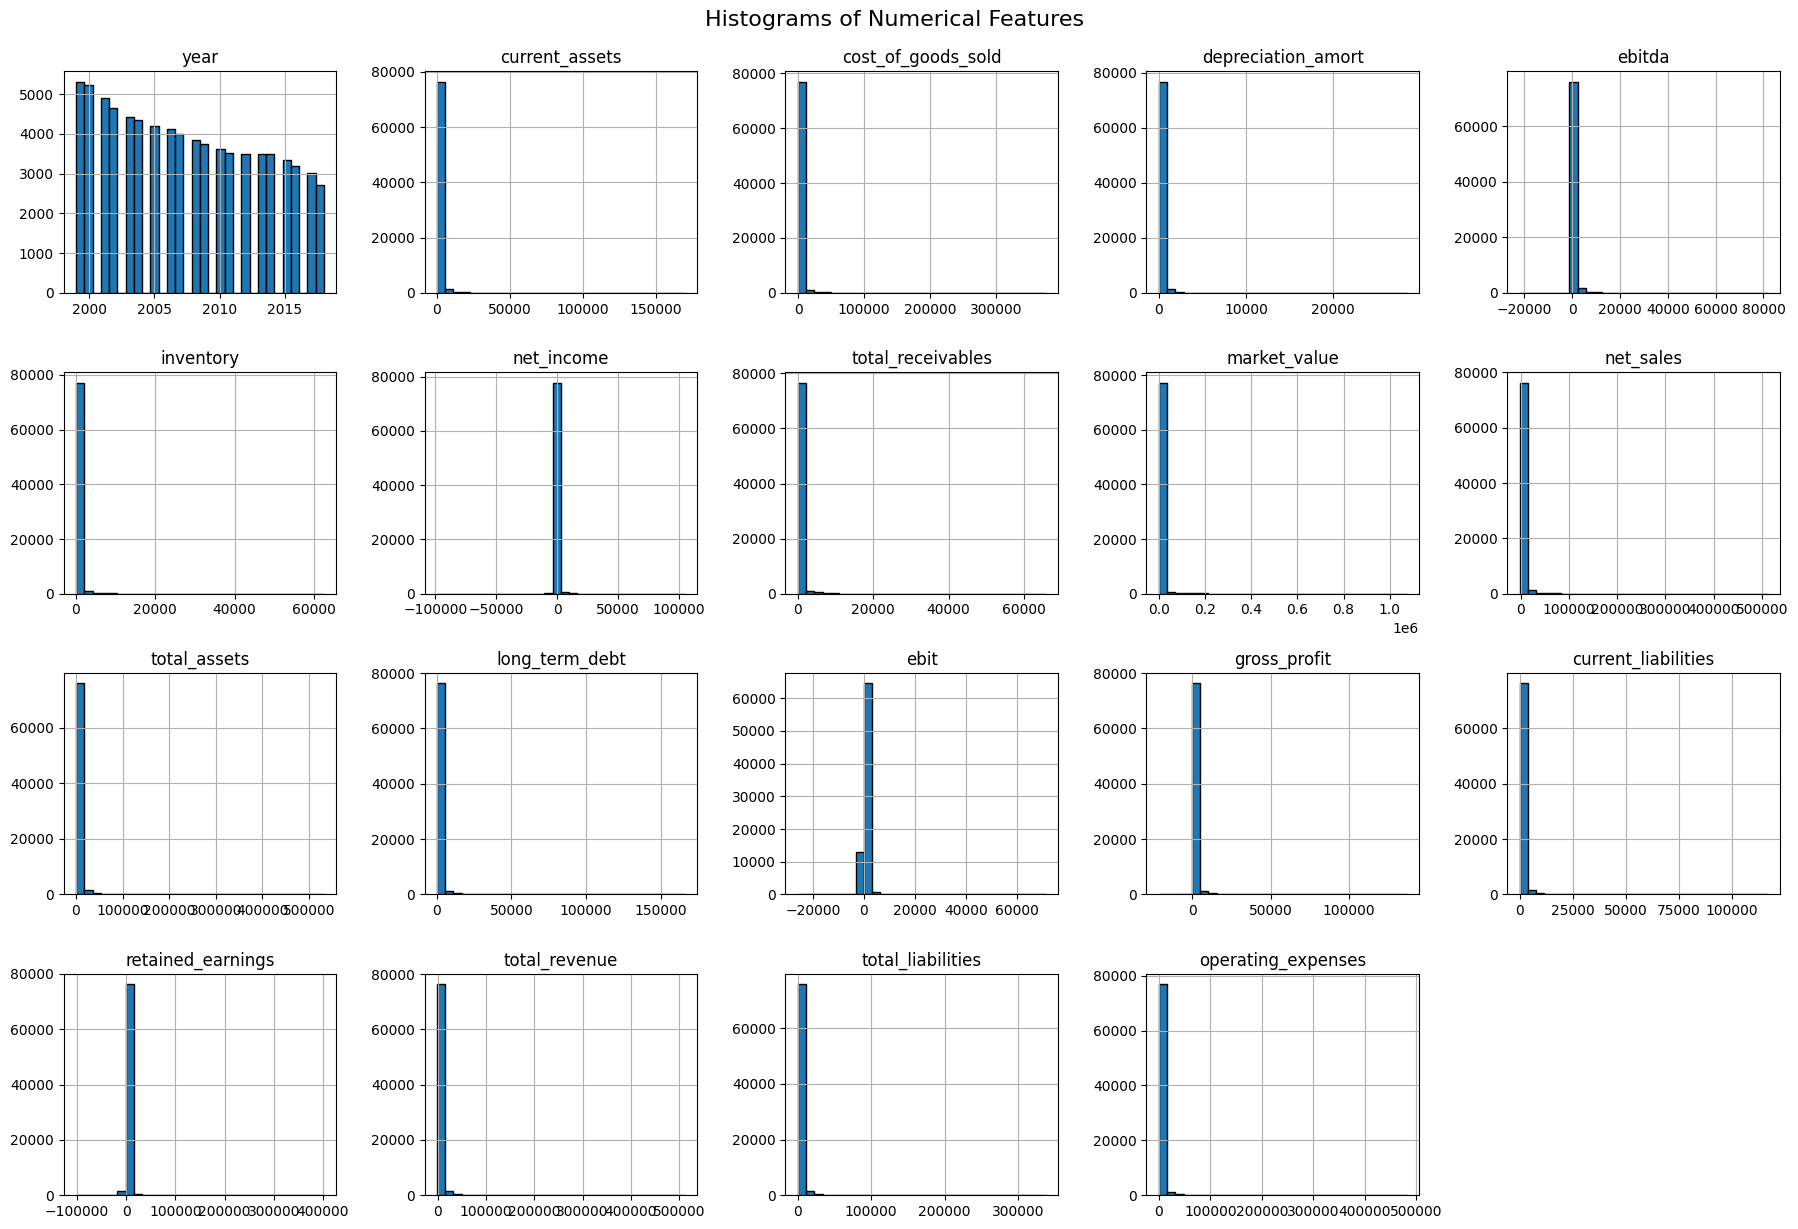

In [20]:
#Plotting Histogram of the numeric features to better understand the dataset

# Select numeric columns only
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
df[numeric_cols].hist(bins=30, figsize=(18, 12), layout=(4, 5), edgecolor='black')
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()


Although the histograms indicate that outliers still exist in the dataset, these values may reflect genuine differences between companies rather than anomalies. Factors such as:

Company size (e.g., small local firms vs. multinational corporations)

Industry context (e.g., technology, manufacturing, or finance)

Growth stage (e.g., startups vs. established firms)

can all contribute to the wide variation in financial figures.

To ensure fair comparison and improve model performance, we will address this in the feature engineering stage by:

1. Using financial ratios, which offer more meaningful insights than raw figures

2. Applying standardization techniques to normalize the dataset and reduce scale-related bias

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76138 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         76138 non-null  object 
 1   status_label         76138 non-null  object 
 2   year                 76138 non-null  int64  
 3   current_assets       76138 non-null  float64
 4   cost_of_goods_sold   76138 non-null  float64
 5   depreciation_amort   76138 non-null  float64
 6   ebitda               76138 non-null  float64
 7   inventory            76138 non-null  float64
 8   net_income           76138 non-null  float64
 9   total_receivables    76138 non-null  float64
 10  market_value         76138 non-null  float64
 11  net_sales            76138 non-null  float64
 12  total_assets         76138 non-null  float64
 13  long_term_debt       76138 non-null  float64
 14  ebit                 76138 non-null  float64
 15  gross_profit         76138 non-null  floa

For further EDA, we will plot bar plots to compare the features to the target column (status label)

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


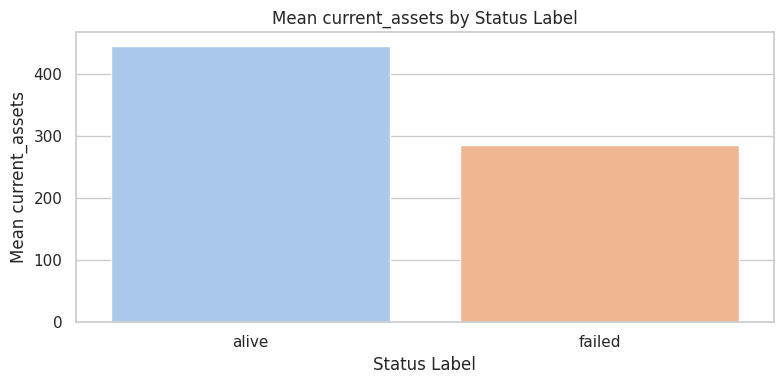

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


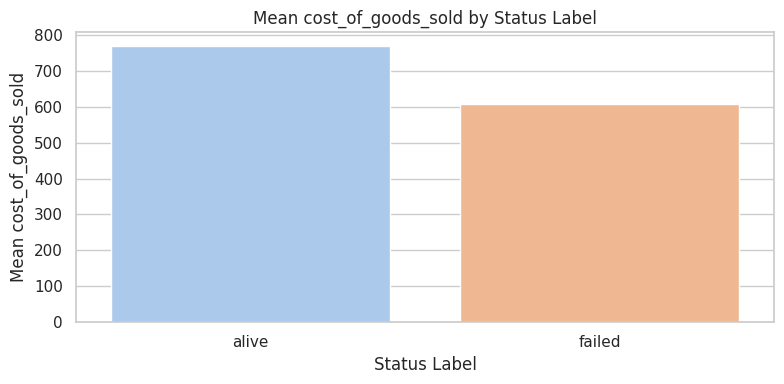

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


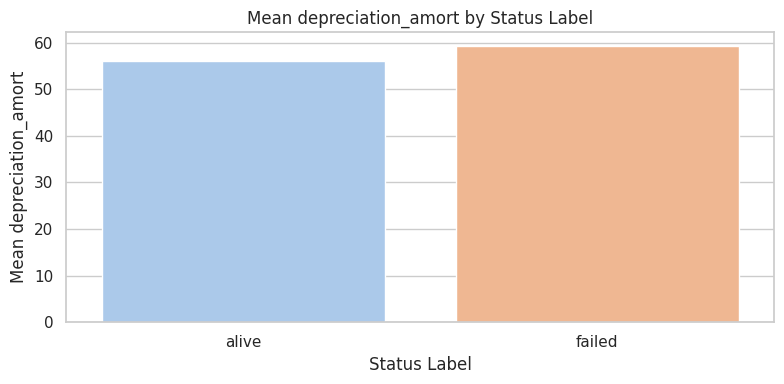

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


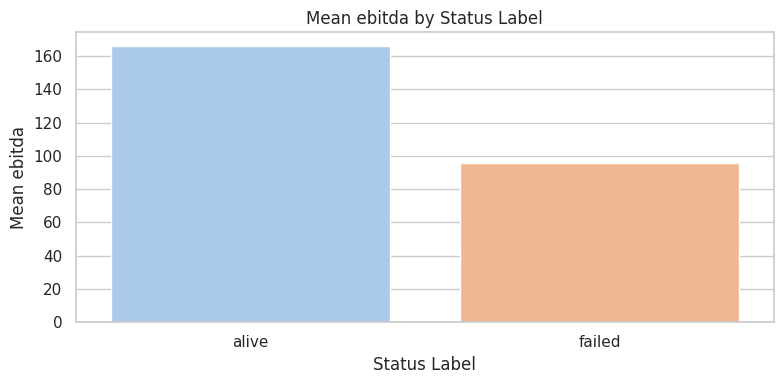

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


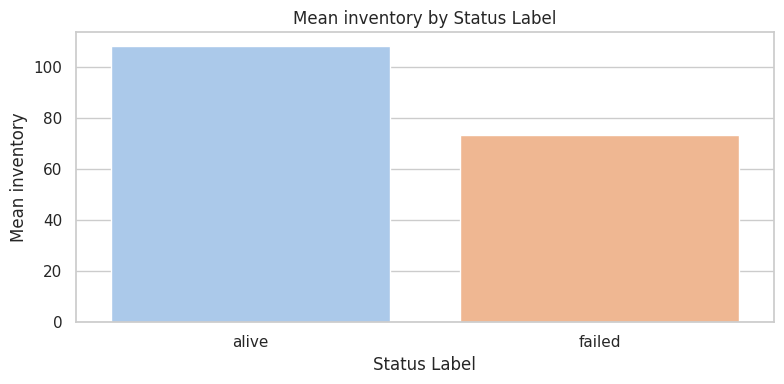

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


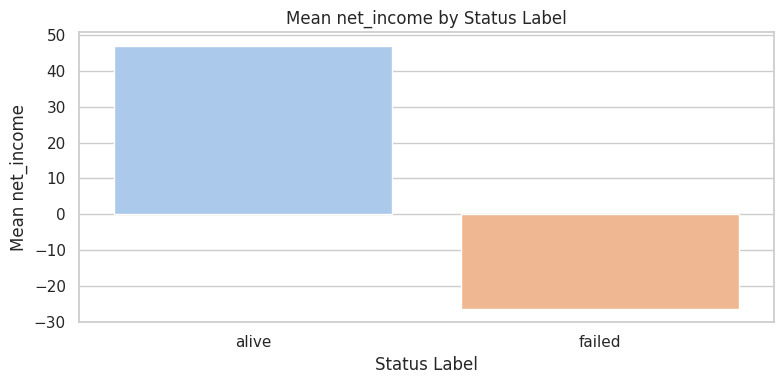

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


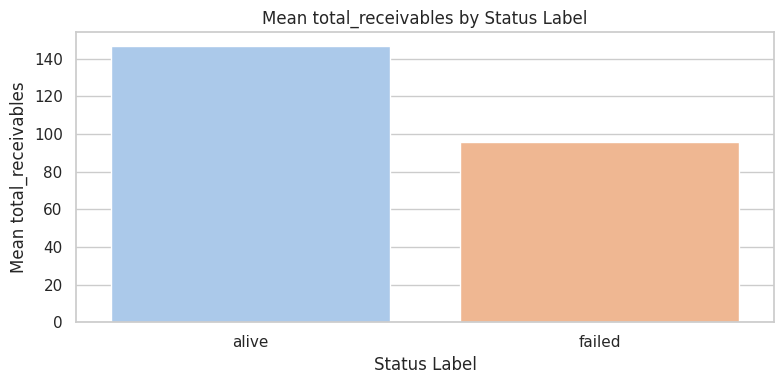

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


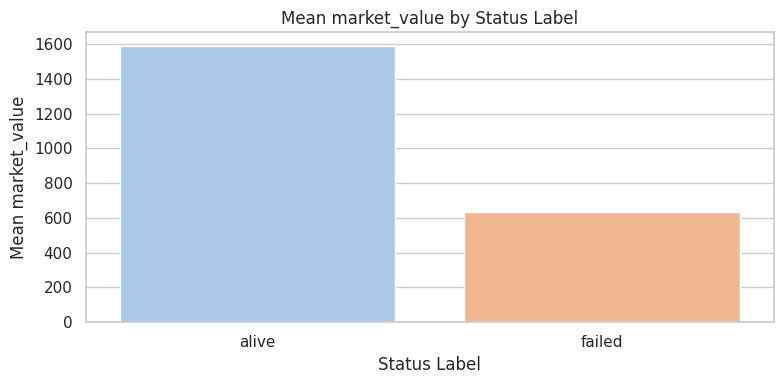

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


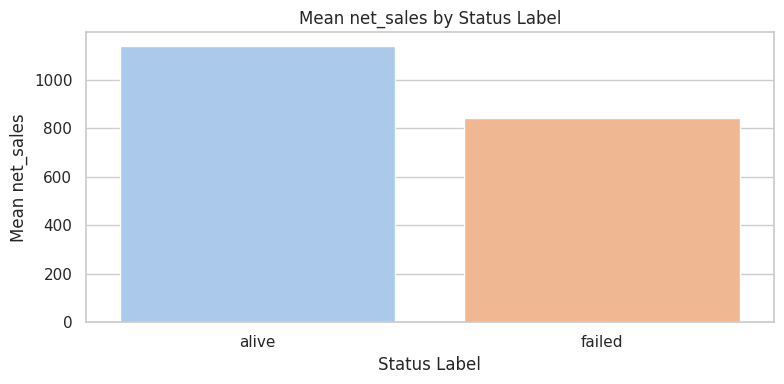

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


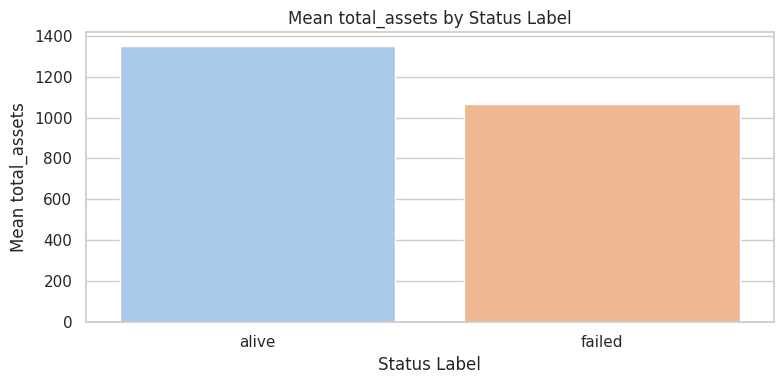

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


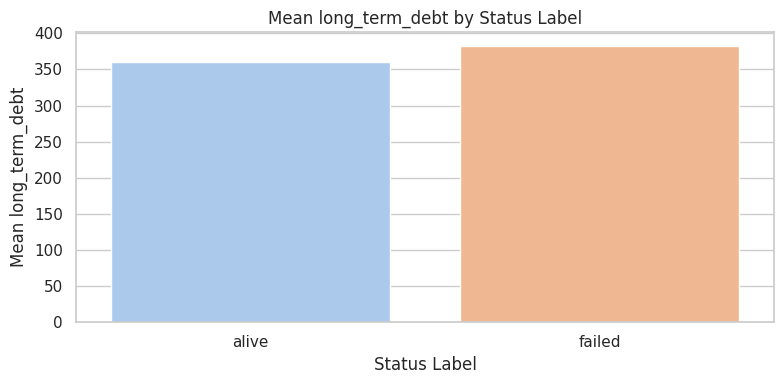

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


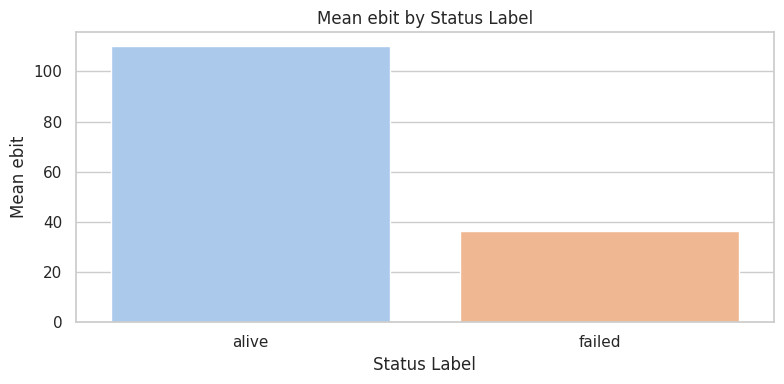

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


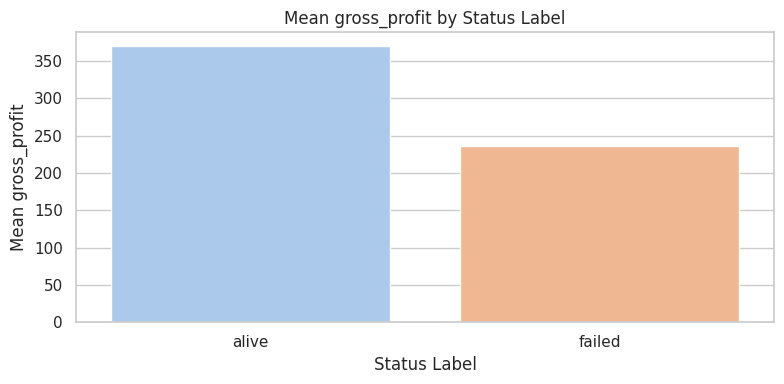

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


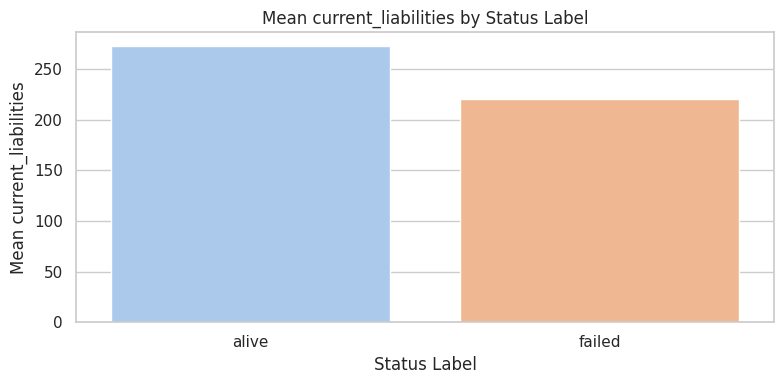

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


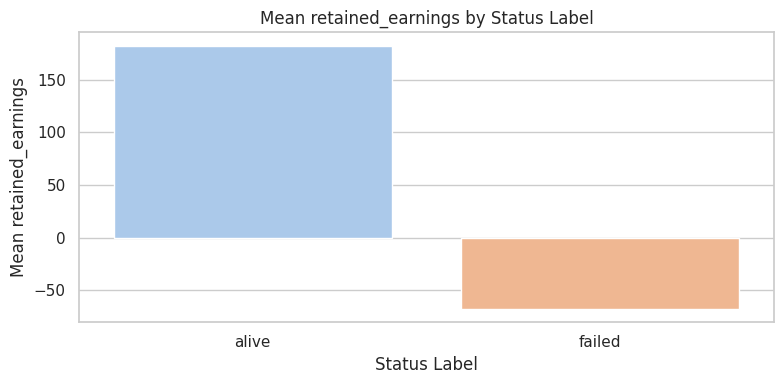

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


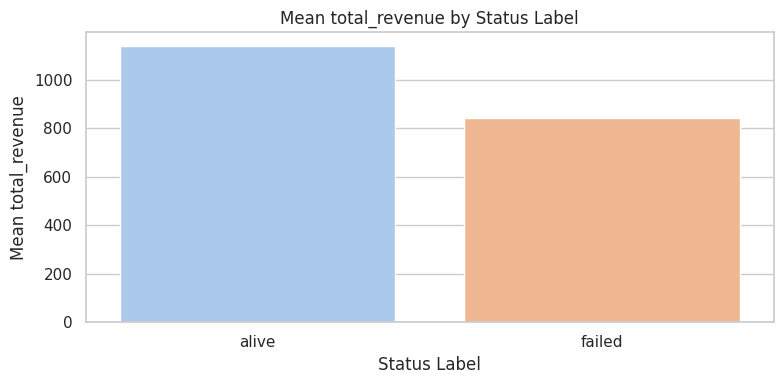

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


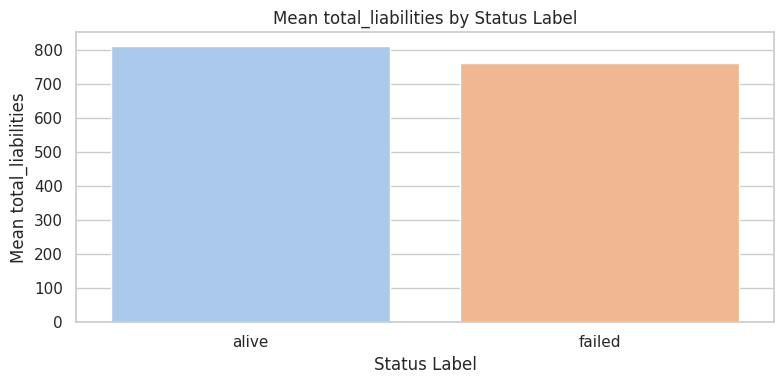

/tmp/ipython-input-363566756.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-363566756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')


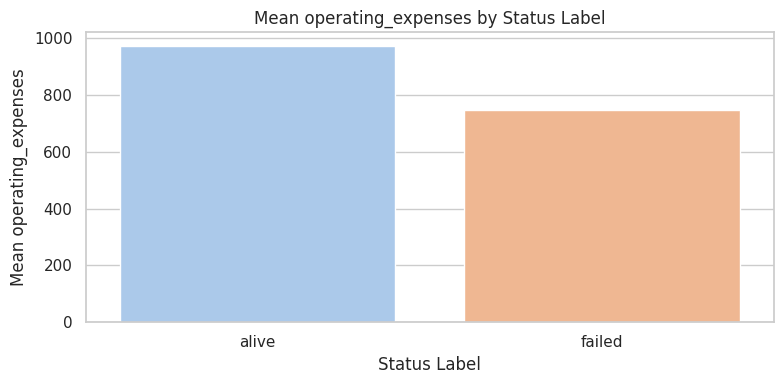

In [22]:
# Select numerical columns only
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns.drop('year')

# Set consistent style
sns.set(style='whitegrid')

# Plot one bar plot per numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='status_label', y=col, data=df2, estimator='mean', ci=None, palette='pastel')
    plt.title(f'Mean {col} by Status Label')
    plt.xlabel('Status Label')
    plt.ylabel(f'Mean {col}')
    plt.tight_layout()
    plt.show()

# INSIGHTS!!!
Companies with negative retained earnings and negative net income tend to show strong signs of potential failure. These two metrics typically signal ongoing losses and a depleted capital base — both of which seriously undermine long-term sustainability.

Note: Since retained earnings are part of shareholders’ equity on the balance sheet, a negative value directly reflects a drop in capital. It’s essentially a red flag for financial instability.

On the flip side, it’s interesting that companies with higher cost of goods sold (COGS) were more likely to survive. At first glance, that might seem counterintuitive — but it actually makes sense. Higher COGS usually means the company has higher inventory turnover and more sales activity. In other words, they’re actively doing business. So in this context, COGS isn't just an expense — it's more like a side effect of being operational and in demand.

## FEATURE ENGINEERING

For the first step in feature engineering, we'll create new features by analyzing how each company’s financials have changed over time. Since most companies in the dataset have data spanning multiple years, we’ll compare their current year to the two preceding years. Specifically, we'll calculate the growth or decline by subtracting values from the previous two years from the current year — that is:

Current year - Last year

Current year - Two years ago

This will help us capture the financial trends and directional changes over the last three fiscal years.

In [23]:
import pandas as pd

# Sort by company and year (latest first)
df2_sorted = df2.sort_values(['company_name', 'year'], ascending=[True, False])

# Identify numeric columns (excluding year)
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns.difference(['year'])

# Rank years within each company (1 = most recent)
df2_sorted['year_rank'] = df2_sorted.groupby('company_name')['year'].rank(method='first', ascending=False)

# Select only the top 3 years per company
top3 = df2_sorted[df2_sorted['year_rank'] <= 3]

# Pivot: Each feature gets columns per rank (1.0, 2.0, 3.0)
pivoted = top3.pivot(index='company_name', columns='year_rank')[numeric_cols]

# Fill missing ranks with NaN (ensures columns exist even if missing)
for r in [1.0, 2.0, 3.0]:
    for col in numeric_cols:
        if (col, r) not in pivoted.columns:
            pivoted[(col, r)] = pd.NA

# Sort columns to maintain rank order
pivoted = pivoted.sort_index(axis=1, level=1)

# Compute deltas: CURRENT - PREVIOUS years
delta1 = pivoted.xs(1.0, level=1, axis=1) - pivoted.xs(2.0, level=1, axis=1)
delta2 = pivoted.xs(1.0, level=1, axis=1) - pivoted.xs(3.0, level=1, axis=1)
delta1.columns = [f'{col}_delta1' for col in delta1.columns]
delta2.columns = [f'{col}_delta2' for col in delta2.columns]

# Mean of numeric columns across all years
mean_values = df2.groupby('company_name')[numeric_cols].mean()
mean_values.columns = [f'{col}_mean' for col in mean_values.columns]

# Year count
year_count = df2.groupby('company_name')['year'].count().rename('year_count')

# Most recent market value
latest_market = df2_sorted.groupby('company_name').first()['market_value'].rename('market_value_latest')

# Most recent status label
latest_status = df2_sorted.groupby('company_name').first()['status_label'].rename('status_label')

# Combine all components
df3 = pd.concat([mean_values, delta1, delta2, year_count, latest_market, latest_status], axis=1)

# Drop any rows with missing values
df3 = df3.dropna()

# Reset index to make company_name a column
df3 = df3.reset_index()




In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7215 entries, 0 to 7214
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_name                7215 non-null   object 
 1   cost_of_goods_sold_mean     7215 non-null   float64
 2   current_assets_mean         7215 non-null   float64
 3   current_liabilities_mean    7215 non-null   float64
 4   depreciation_amort_mean     7215 non-null   float64
 5   ebit_mean                   7215 non-null   float64
 6   ebitda_mean                 7215 non-null   float64
 7   gross_profit_mean           7215 non-null   float64
 8   inventory_mean              7215 non-null   float64
 9   long_term_debt_mean         7215 non-null   float64
 10  market_value_mean           7215 non-null   float64
 11  net_income_mean             7215 non-null   float64
 12  net_sales_mean              7215 non-null   float64
 13  operating_expenses_mean     7215 

In [25]:
df3 = df3.dropna()


In [26]:
df3['status_label'].value_counts()

status_label
alive     6644
failed     571
Name: count, dtype: int64

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


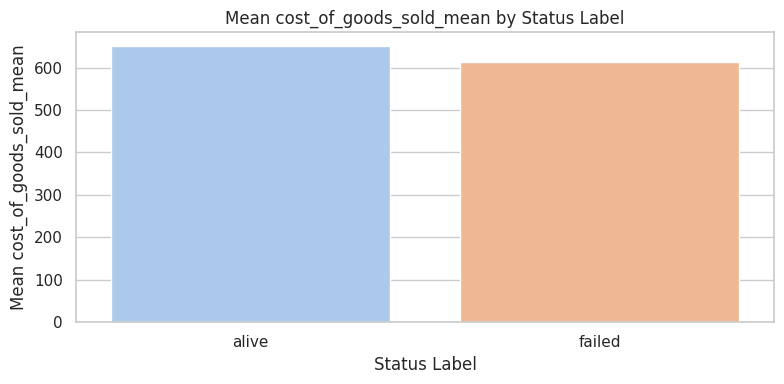

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


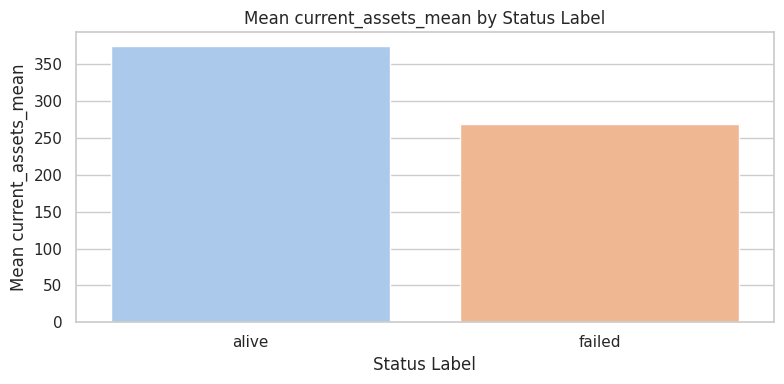

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


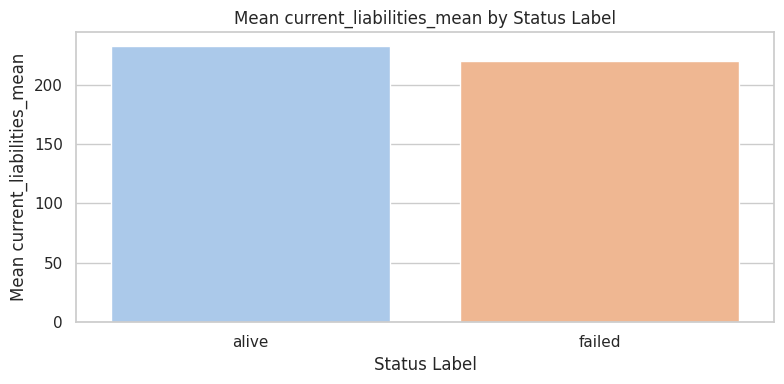

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


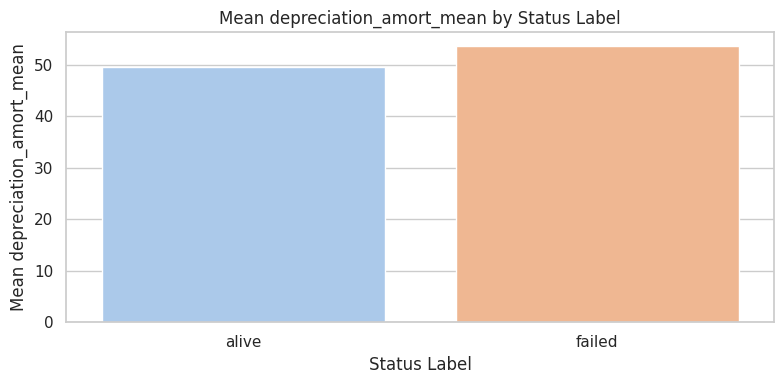

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


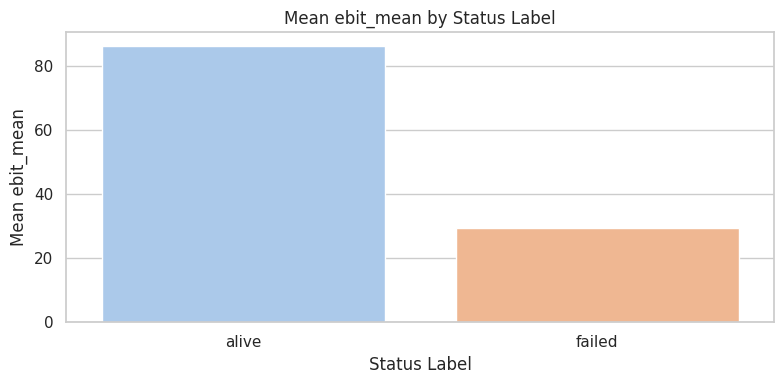

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


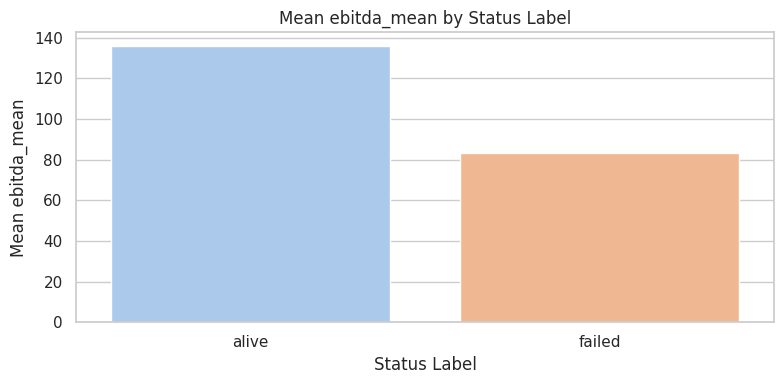

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


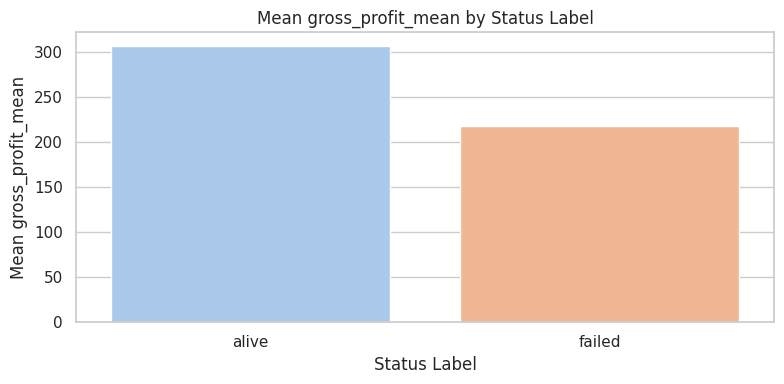

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


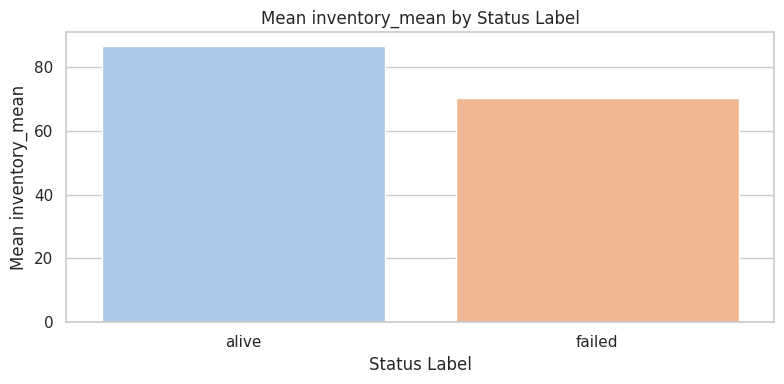

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


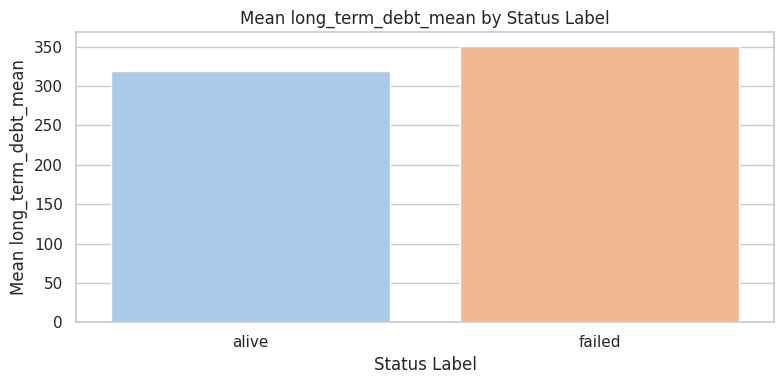

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


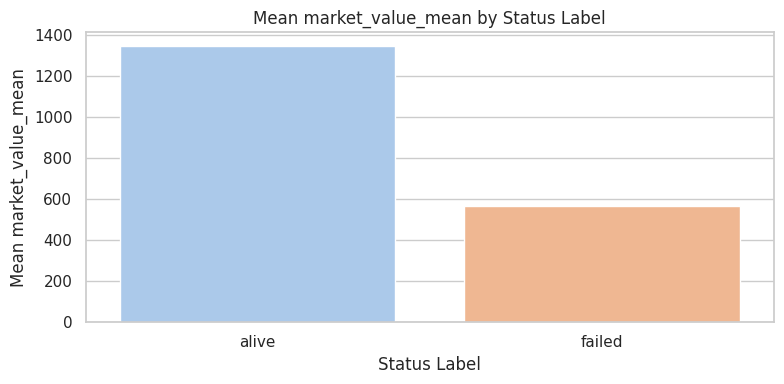

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


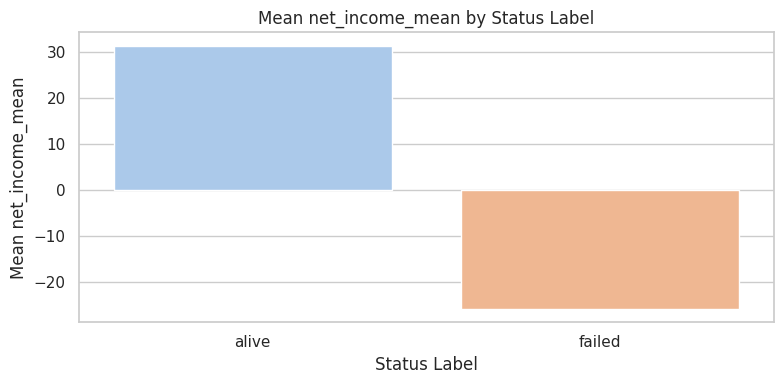

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


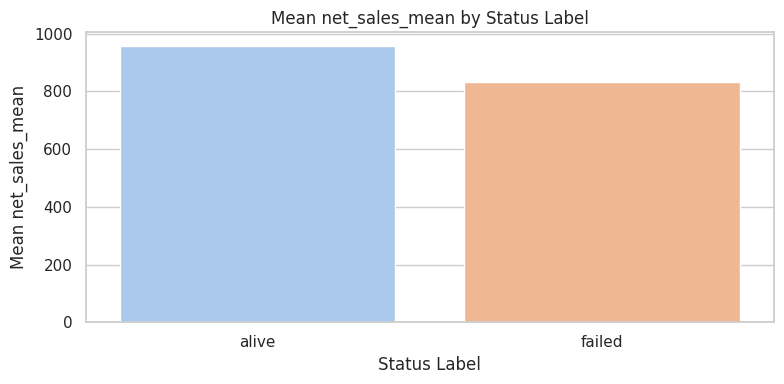

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


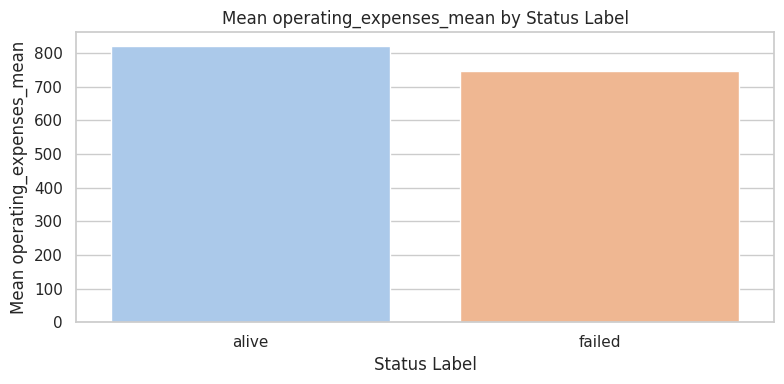

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


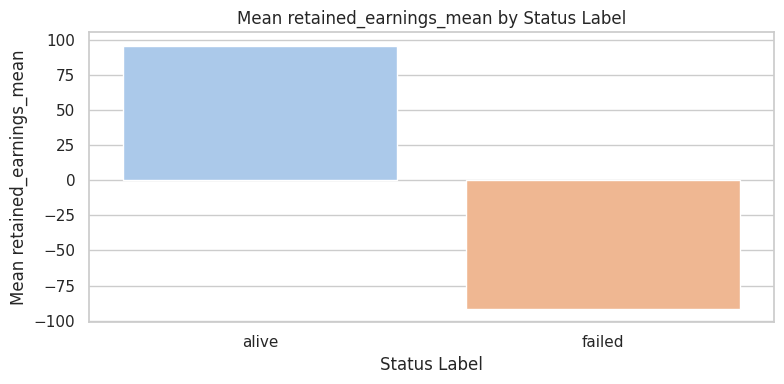

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


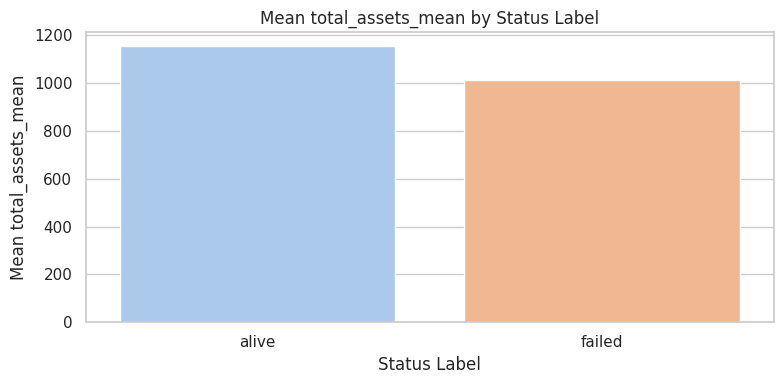

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


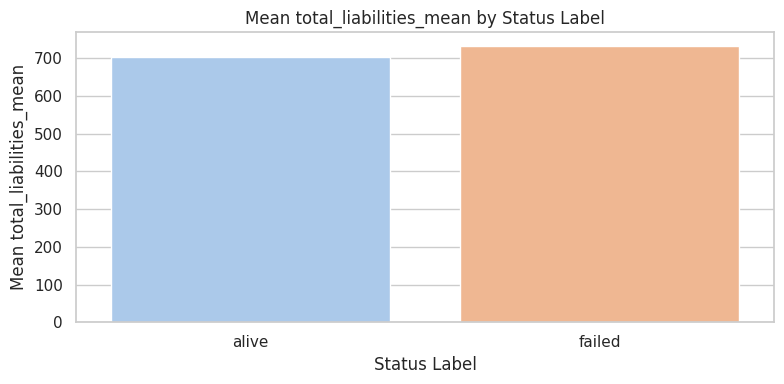

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


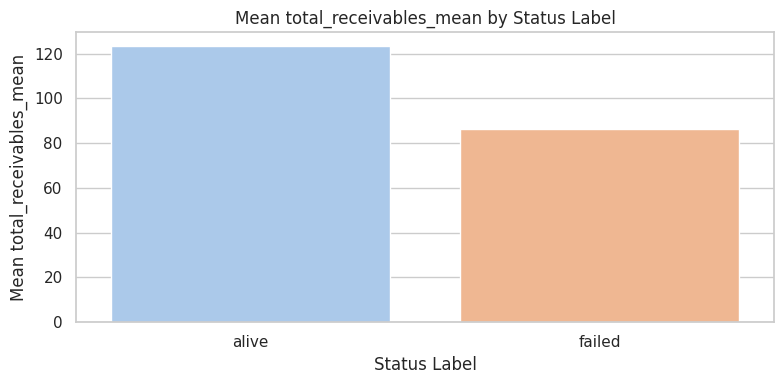

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


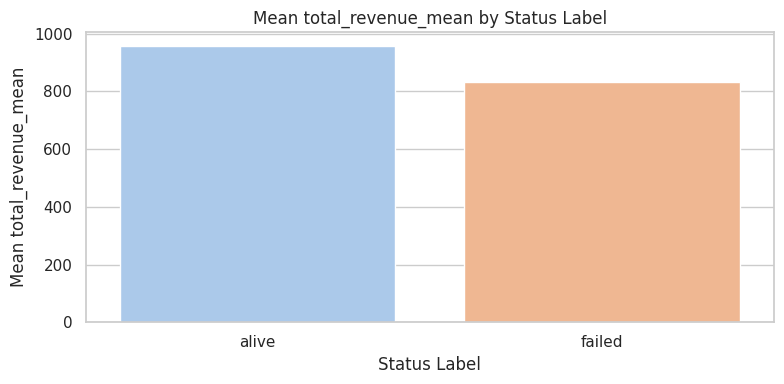

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


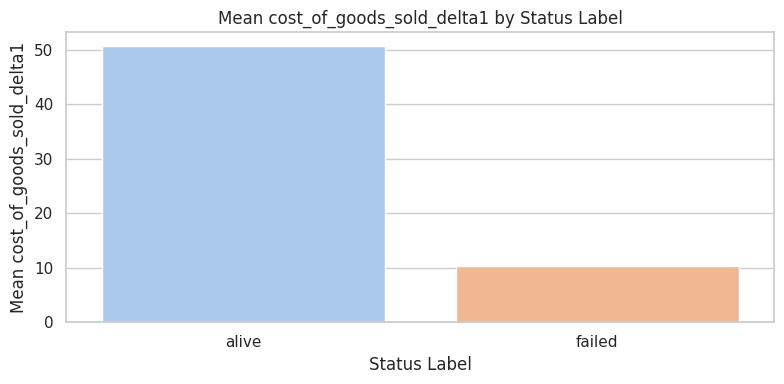

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


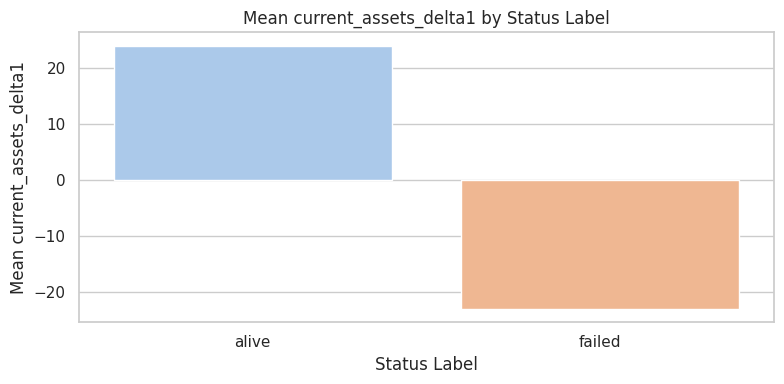

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


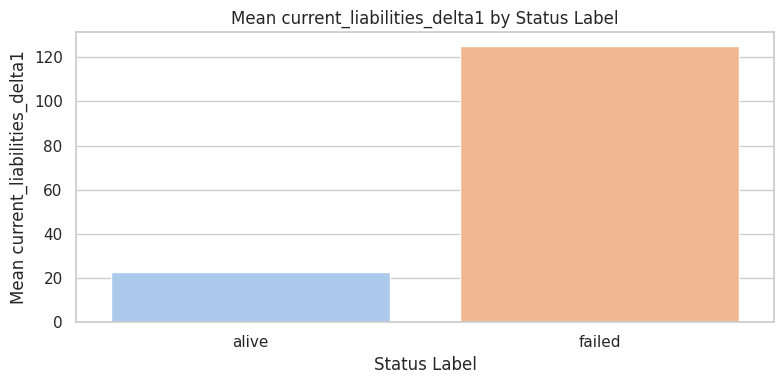

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


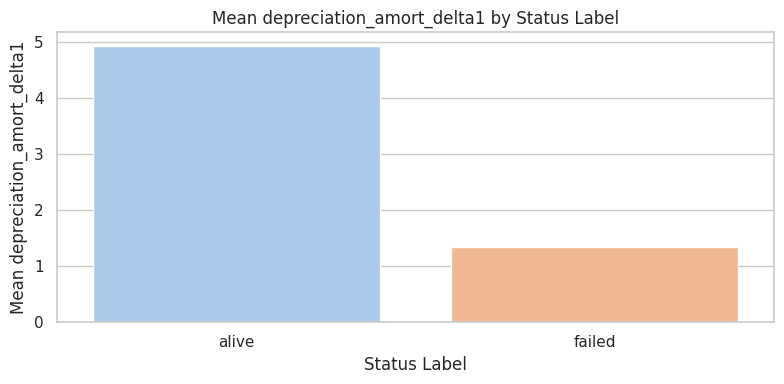

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


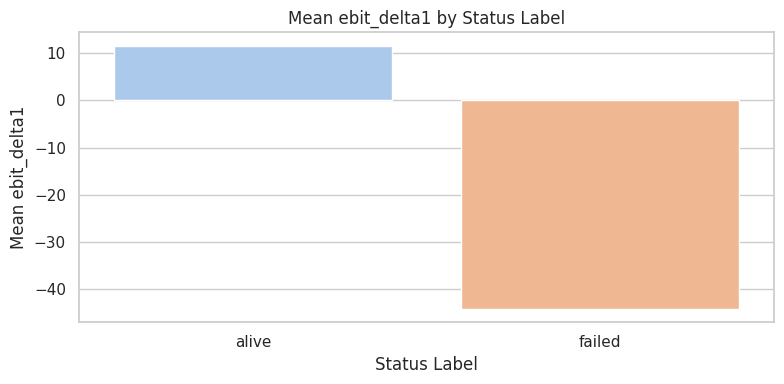

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


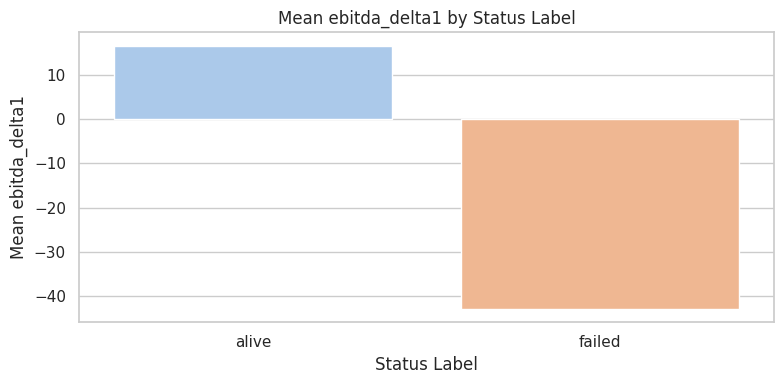

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


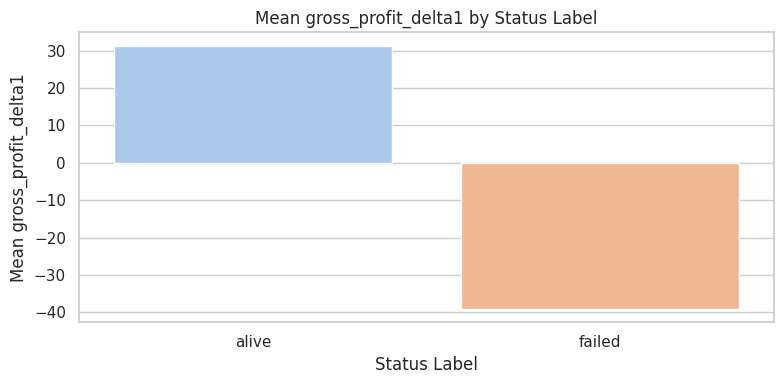

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


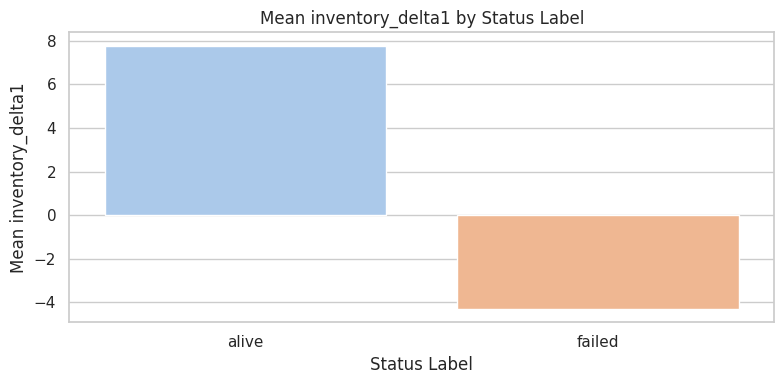

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


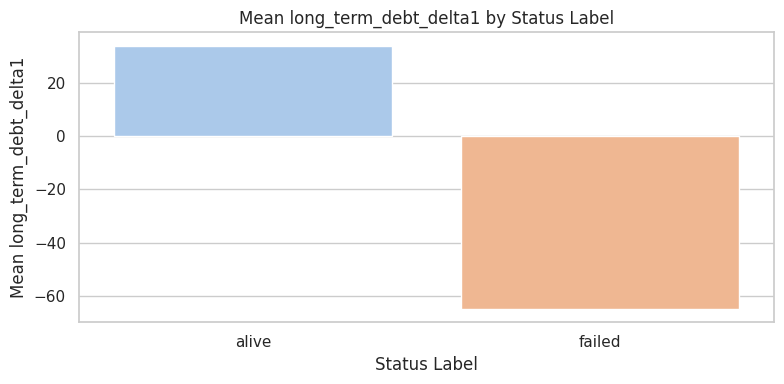

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


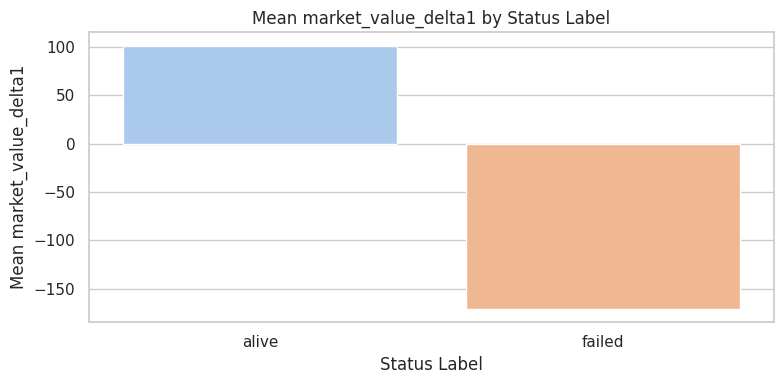

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


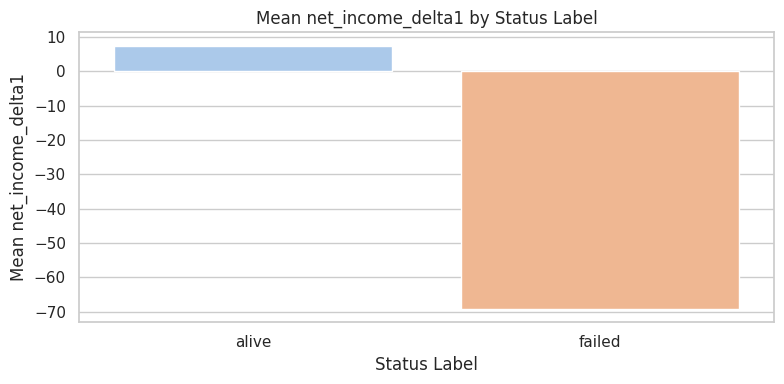

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


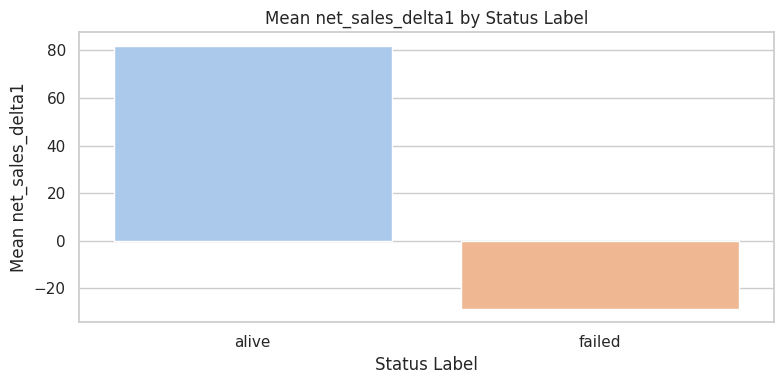

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


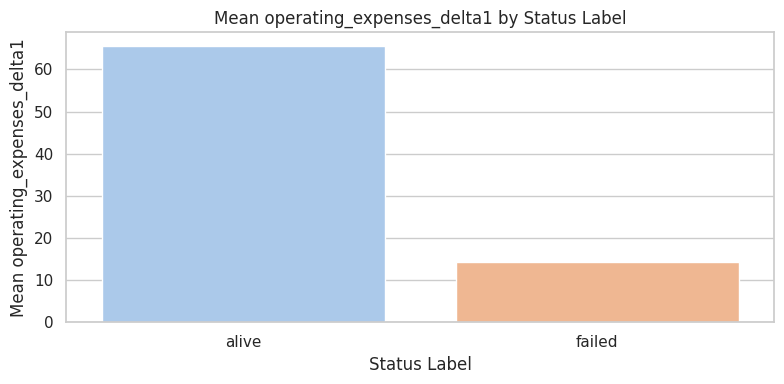

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


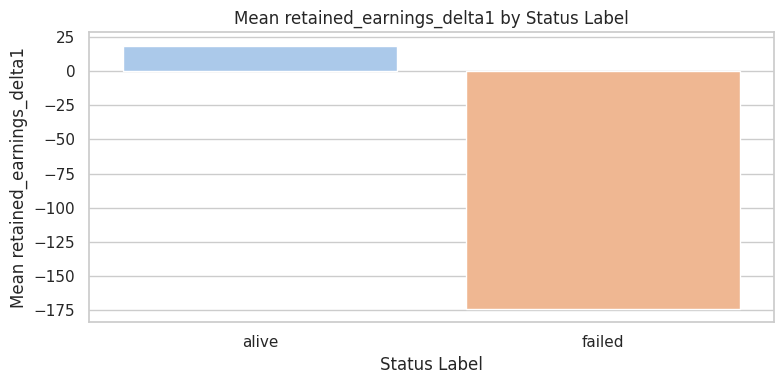

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


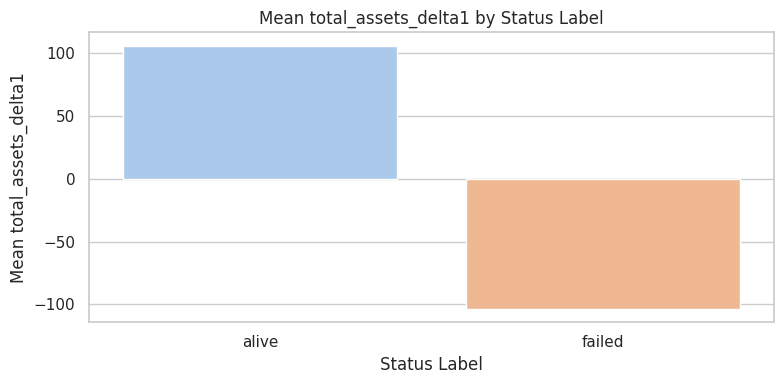

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


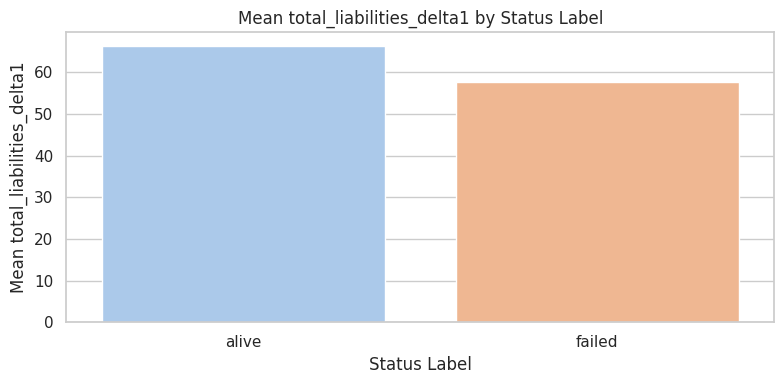

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


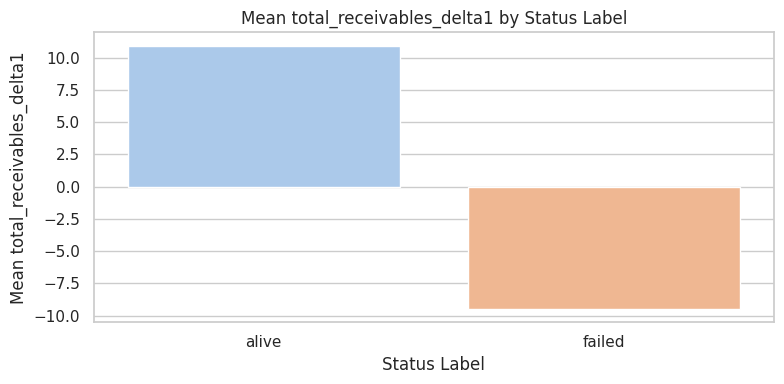

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


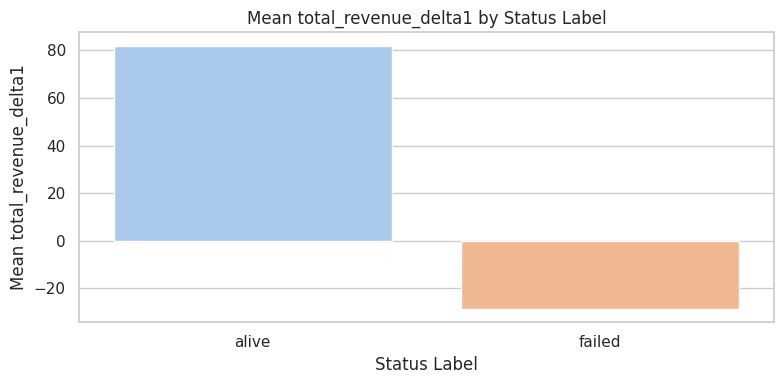

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


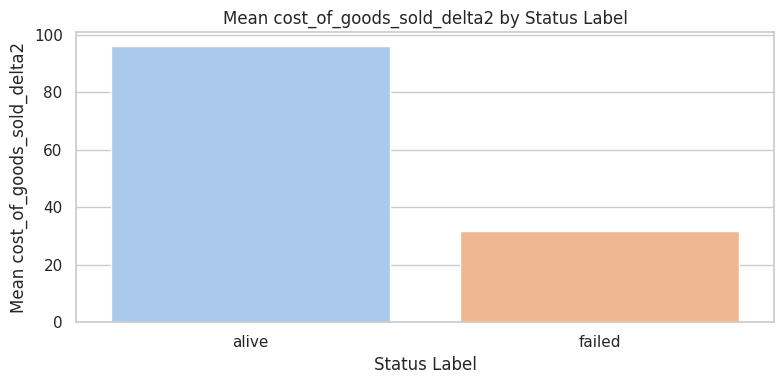

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


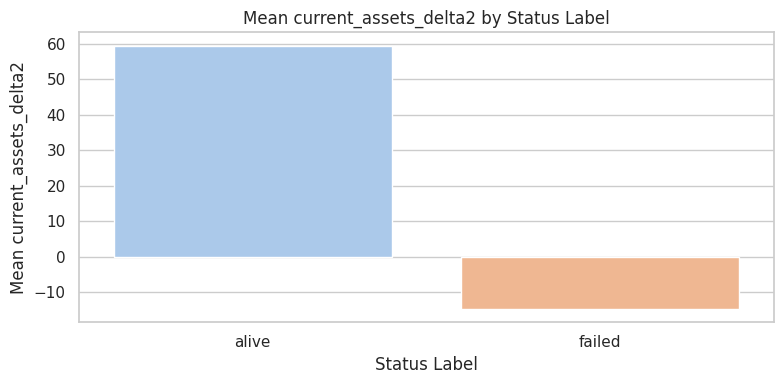

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


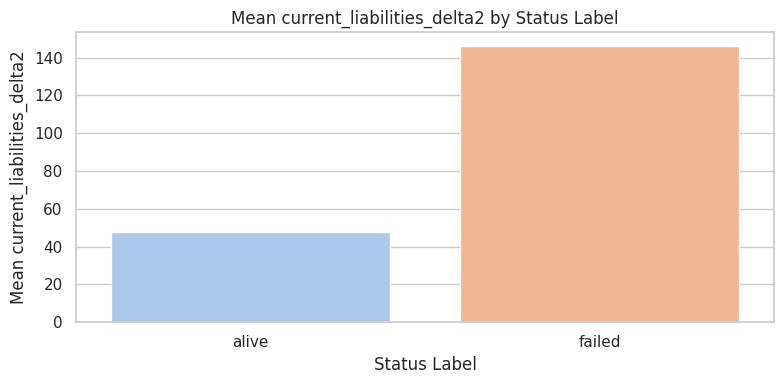

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


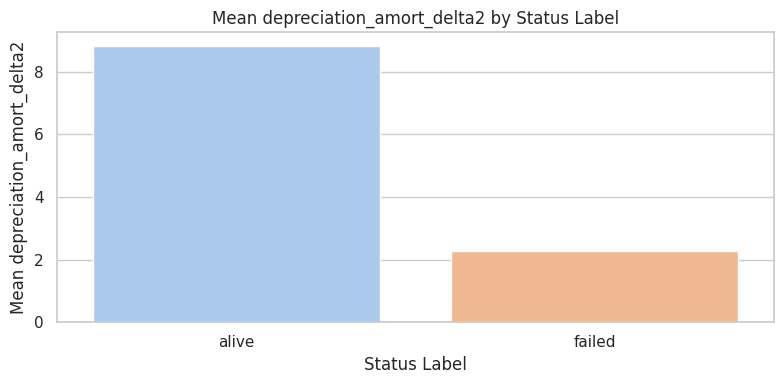

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


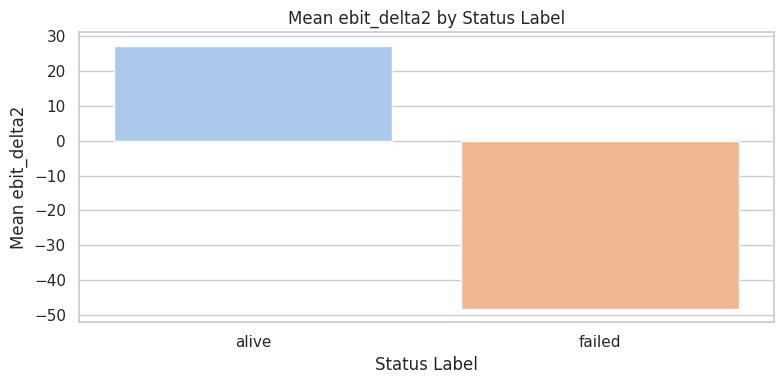

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


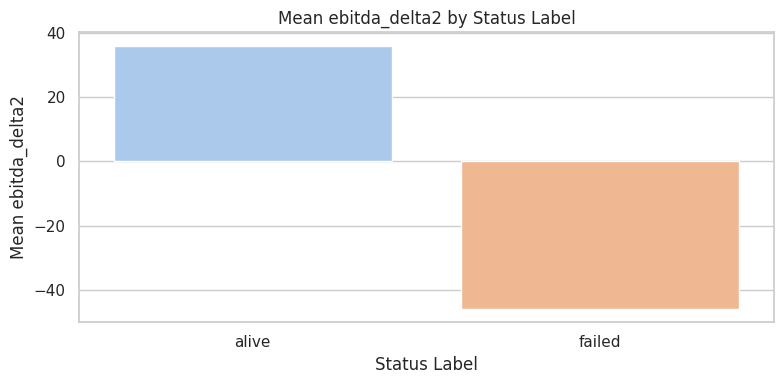

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


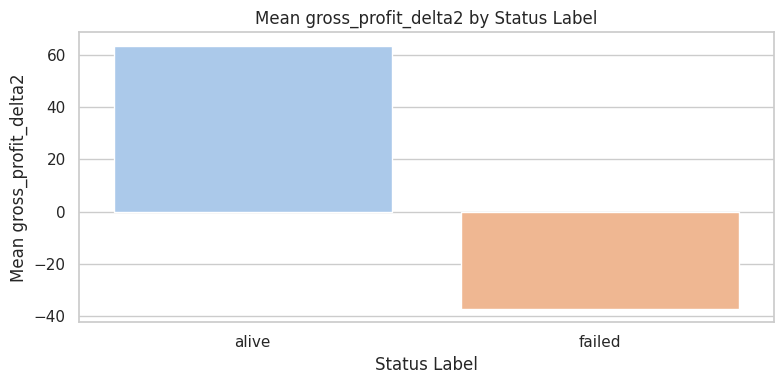

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


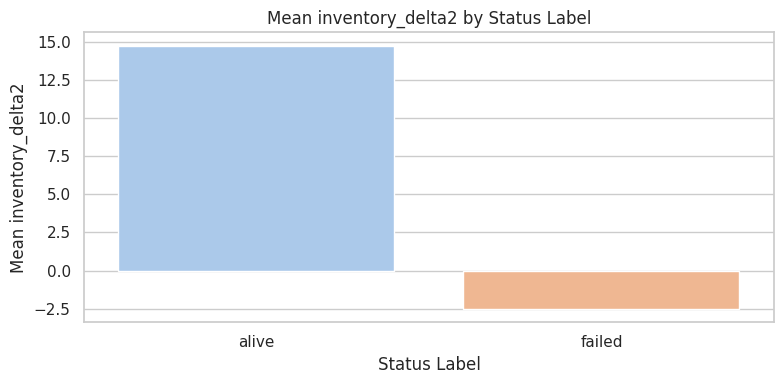

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


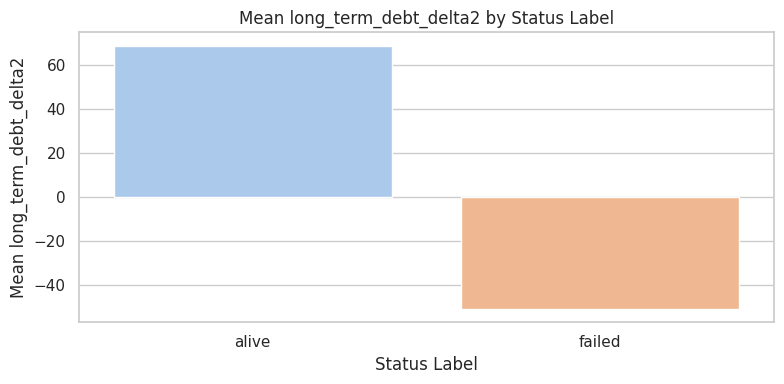

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


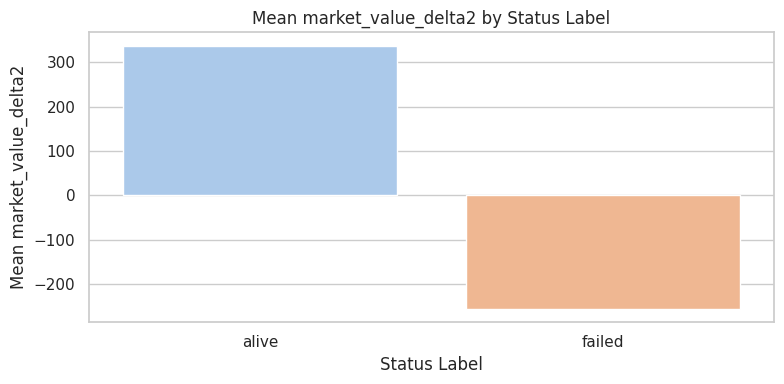

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


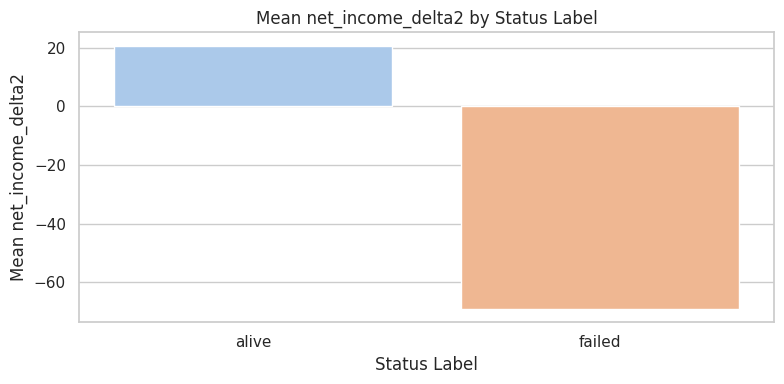

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


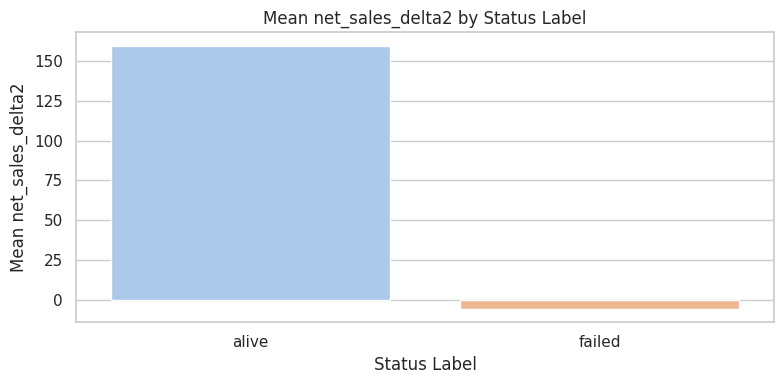

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


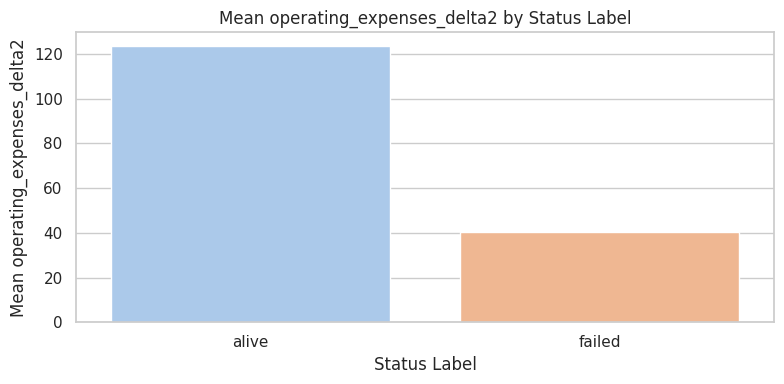

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


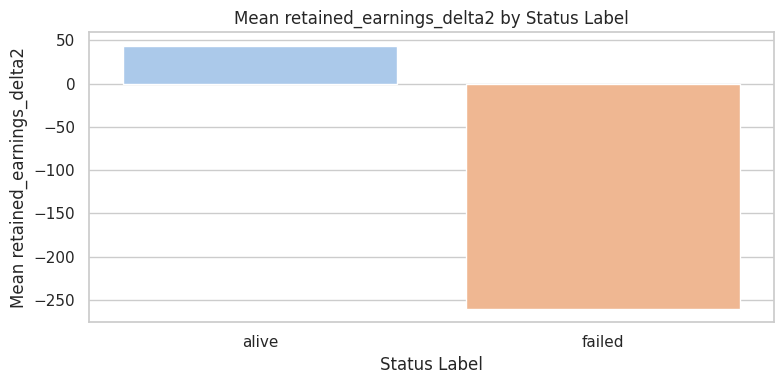

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


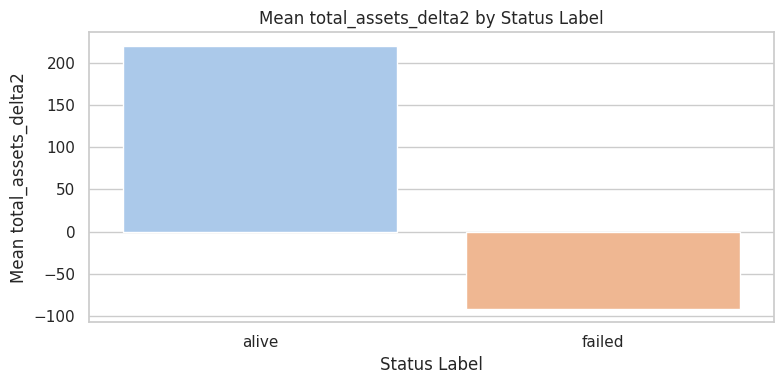

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


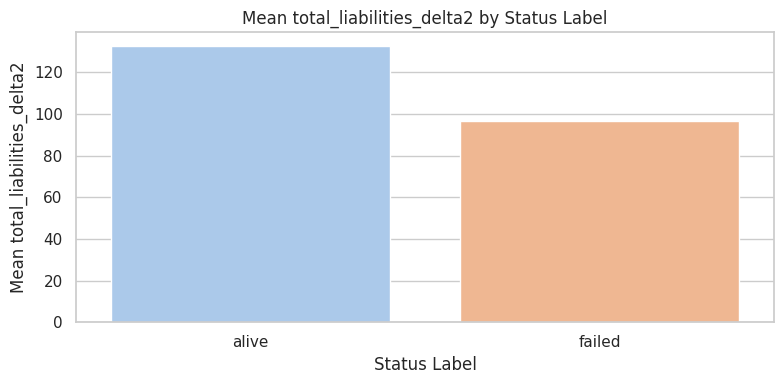

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


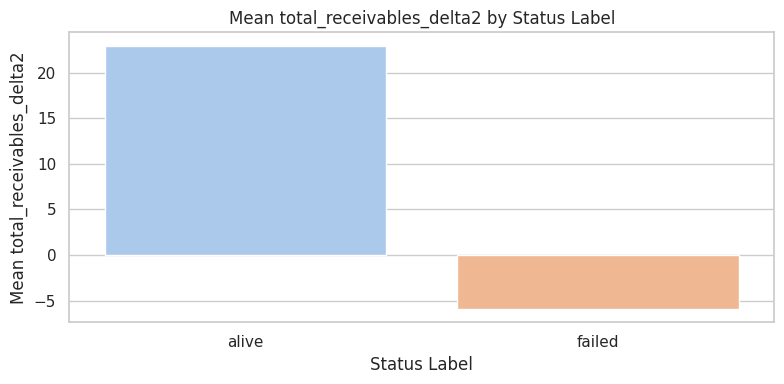

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


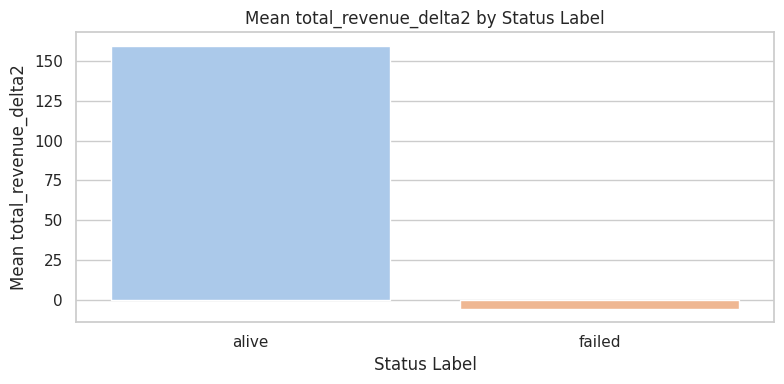

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


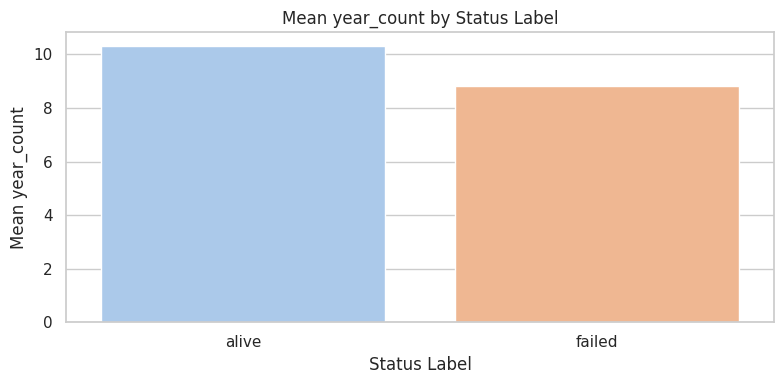

/tmp/ipython-input-321255783.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
/tmp/ipython-input-321255783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')


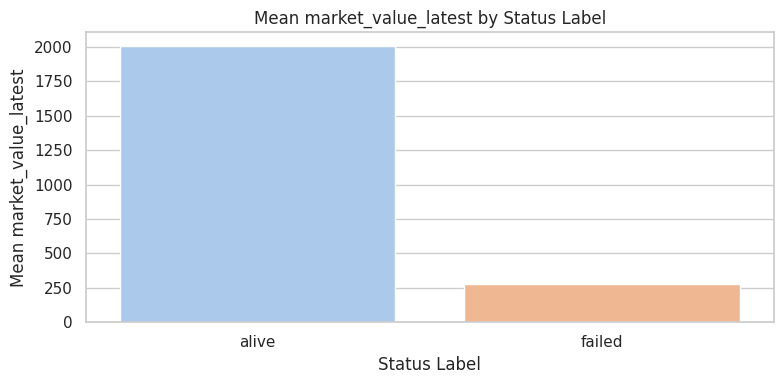

In [27]:
# Select numerical columns only
numeric_cols = df3.select_dtypes(include=['float64', 'int64'])

# Set consistent style
sns.set(style='whitegrid')

# Plot one bar plot per numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='status_label', y=col, data=df3, estimator='mean', ci=None, palette='pastel')
    plt.title(f'Mean {col} by Status Label')
    plt.xlabel('Status Label')
    plt.ylabel(f'Mean {col}')
    plt.tight_layout()
    plt.show()

Companies that experienced a decline in asset and profit values over the past two years compared to the current year were more likely to fail. This pattern suggests that sustained financial deterioration — particularly in profitability and asset base — is a strong indicator of potential business distress.

For the next feature engineering step, we have engineed some financial ratios for each company for three financial year

### 📊 Engineered Financial Features

Below are the financial ratios and metrics we engineered during the feature engineering step. These were computed for each of the most recent 3 years per company.

| **Feature**               | **Definition**                                                                                  | **Formula** |
|---------------------------|-----------------------------------------------------------------------------------------------|-------------|
| `gross_profit_margin`     | Measures how efficiently a company produces goods relative to its sales revenue.             | `gross_profit / net_sales` |
| `net_profit_margin`       | Indicates how much net income a company retains from its total sales.                        | `net_income / net_sales` |
| `return_on_assets`        | Evaluates how effectively a company uses its assets to generate profit.                      | `net_income / total_assets` |
| `return_on_equity`        | Shows how well a company generates returns on shareholders’ equity.                         | `net_income / (total_assets - total_liabilities)` |
| `liquidity_ratio`         | Assesses a company's ability to pay off its current liabilities using current assets.        | `current_assets / current_liabilities` |
| `quick_ratio`             | Measures a company’s short-term liquidity excluding inventory.                              | `(current_assets - inventory) / current_liabilities` |
| `debt_to_asset`           | Indicates the proportion of a company’s assets financed through debt.                       | `total_liabilities / total_assets` |
| `debt_to_equity`          | Compares a company’s total liabilities to shareholders’ equity.                             | `total_liabilities / (total_assets - total_liabilities)` |
| `asset_turnover`          | Reflects how efficiently a company uses its assets to generate sales.                       | `net_sales / total_assets` |
| `market_value`            | Represents the company's total market capitalization.                                        | *Provided as raw data* |

These features form the basis of our analysis, and their year-over-year changes help assess company performance trends.


In [28]:
import pandas as pd

# Sort and get last 3 years per company
df_sorted = df2.sort_values(by=['company_name', 'year'], ascending=[True, False])
df_recent = df_sorted.groupby('company_name').head(3).copy()

# Assign relative year: 1 = most recent, 2 = previous, etc.
df_recent['relative_year'] = df_recent.groupby('company_name').cumcount() + 1

# Financial ratios
df_recent['gross_profit_margin'] = df_recent['gross_profit'] / df_recent['net_sales']
df_recent['net_profit_margin'] = df_recent['net_income'] / df_recent['net_sales']
df_recent['return_on_assets'] = df_recent['net_income'] / df_recent['total_assets']
df_recent['return_on_equity'] = df_recent['net_income'] / (df_recent['total_assets'] - df_recent['total_liabilities'])
df_recent['liquidity_ratio'] = df_recent['current_assets'] / df_recent['current_liabilities']
df_recent['quick_ratio'] = (df_recent['current_assets'] - df_recent['inventory']) / df_recent['current_liabilities']
df_recent['debt_to_asset'] = df_recent['total_liabilities'] / df_recent['total_assets']
df_recent['debt_to_equity'] = df_recent['total_liabilities'] / (df_recent['total_assets'] - df_recent['total_liabilities'])
df_recent['asset_turnover'] = df_recent['net_sales'] / df_recent['total_assets']

# Add raw fields to keep
raw_fields = ['market_value']

# Select columns to pivot
all_features = [
    'gross_profit_margin', 'net_profit_margin', 'return_on_assets', 'return_on_equity',
    'liquidity_ratio', 'quick_ratio', 'debt_to_asset', 'debt_to_equity', 'asset_turnover'
] + raw_fields

df_features = df_recent[['company_name', 'relative_year', 'status_label'] + all_features].copy()

# Pivot so each company has one row
df_pivot = df_features.pivot(index='company_name', columns='relative_year', values=all_features)

# Flatten multi-index column names
df_pivot.columns = [f"{feature}_year{year}" for feature, year in df_pivot.columns]

# Reset index to get company_name as column
df_pivot = df_pivot.reset_index()

# Get the most recent status label (relative_year == 1)
latest_status = df_recent[df_recent['relative_year'] == 1][['company_name', 'status_label']]

# Merge status label into the final dataset
df_final = pd.merge(df_pivot, latest_status, on='company_name', how='left')

# Drop any rows with missing values
df4 = df_final.dropna()

# Done: your dataset is in df_final
df4.info()






<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8900
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               7215 non-null   object 
 1   gross_profit_margin_year1  7215 non-null   float64
 2   gross_profit_margin_year2  7215 non-null   float64
 3   gross_profit_margin_year3  7215 non-null   float64
 4   net_profit_margin_year1    7215 non-null   float64
 5   net_profit_margin_year2    7215 non-null   float64
 6   net_profit_margin_year3    7215 non-null   float64
 7   return_on_assets_year1     7215 non-null   float64
 8   return_on_assets_year2     7215 non-null   float64
 9   return_on_assets_year3     7215 non-null   float64
 10  return_on_equity_year1     7215 non-null   float64
 11  return_on_equity_year2     7215 non-null   float64
 12  return_on_equity_year3     7215 non-null   float64
 13  liquidity_ratio_year1      7215 non-null   float64
 1

In [29]:
df4.head()

company_name  gross_profit_margin_year1  gross_profit_margin_year2  \
0          C_1                   0.191672                   0.195123   
1         C_10                   0.367367                   0.411900   
2        C_100                   0.583105                   0.574773   
3       C_1000                   0.728188                   0.717467   
4       C_1002                   0.269907                   0.256797   

   gross_profit_margin_year3  net_profit_margin_year1  \
0                   0.185072                 0.008923   
1                   0.383520                 0.138448   
2                   0.549217                 0.124115   
3                   0.687511                 0.312880   
4                   0.255871                 0.029638   

   net_profit_margin_year2  net_profit_margin_year3  return_on_assets_year1  \
0                 0.031964                 0.028690                0.010232   
1                 0.137003                 0.126343                0.028931   
2                 0.293112                 0.302978                0.049289   
3                 0.246743                 0.372019                0.207021   
4                 0.048727                 0.043142                0.027251   

   return_on_assets_year2  return_on_assets_year3  ...  debt_to_equity_year1  \
0                0.037564                0.033077  ...              0.628431   
1                0.028700                0.027620  ...              2.302519   
2                0.116009                0.112178  ...              0.189553   
3                0.158727                0.242935  ...              3.105035   
4                0.062260                0.058041  ...              0.071677   

   debt_to_equity_year2  debt_to_equity_year3  asset_turnover_year1  \
0              0.645264              0.665627              1.146652   
1              2.313858              2.242411              0.208968   
2              0.133785              0.094178              0.397126   
3              3.449953              3.867490              0.661662   
4              0.100268              0.140827              0.919466   

   asset_turnover_year2  asset_turnover_year3  market_value_year1  \
0              1.175188              1.152902           1551.4580   
1              0.209488              0.218610           9551.0904   
2              0.395783              0.370253            459.0008   
3              0.643289              0.653016          42213.0960   
4              1.277740              1.345365             72.2314   

   market_value_year2  market_value_year3  status_label  
0           1200.3288            842.5112         alive  
1           9519.0354           8687.6261         alive  
2            362.4187           2406.0002         alive  
3          42976.7800          27777.5820         alive  
4             79.1340             58.6107         alive  

[5 rows x 32 columns]

In [30]:
df4.shape

(7215, 32)

In [31]:
type(df4)

pandas.core.frame.DataFrame

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8900
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               7215 non-null   object 
 1   gross_profit_margin_year1  7215 non-null   float64
 2   gross_profit_margin_year2  7215 non-null   float64
 3   gross_profit_margin_year3  7215 non-null   float64
 4   net_profit_margin_year1    7215 non-null   float64
 5   net_profit_margin_year2    7215 non-null   float64
 6   net_profit_margin_year3    7215 non-null   float64
 7   return_on_assets_year1     7215 non-null   float64
 8   return_on_assets_year2     7215 non-null   float64
 9   return_on_assets_year3     7215 non-null   float64
 10  return_on_equity_year1     7215 non-null   float64
 11  return_on_equity_year2     7215 non-null   float64
 12  return_on_equity_year3     7215 non-null   float64
 13  liquidity_ratio_year1      7215 non-null   float64
 1

For the next step, we subtracted the previous two years from the current year. a positive figure indicates and a negative value indicaates a drop.

In [33]:

base_cols = [col for col in df4.columns if col.endswith('year1')]


delta_cols = [col for col in df4.columns if col.endswith('year2') or col.endswith('year3')]

# Calculate deltas (year1 - year2 and year1 - year3)
delta_data = {}
for col in delta_cols:
    base_col = col.replace('year2', 'year1').replace('year3', 'year1')
    delta_name = col.replace('year2', 'delta_from_year2').replace('year3', 'delta_from_year3')
    delta_data[delta_name] = df4[base_col] - df4[col]

# Create new DataFrame with company_name, status_label, and year1 features
df5 = df4[['company_name', 'status_label'] + base_cols].copy()

# Add delta columns to df5
for col_name, values in delta_data.items():
    df5[col_name] = values

# Check structure of df5
df5.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8900
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   company_name                          7215 non-null   object 
 1   status_label                          7215 non-null   object 
 2   gross_profit_margin_year1             7215 non-null   float64
 3   net_profit_margin_year1               7215 non-null   float64
 4   return_on_assets_year1                7215 non-null   float64
 5   return_on_equity_year1                7215 non-null   float64
 6   liquidity_ratio_year1                 7215 non-null   float64
 7   quick_ratio_year1                     7215 non-null   float64
 8   debt_to_asset_year1                   7215 non-null   float64
 9   debt_to_equity_year1                  7215 non-null   float64
 10  asset_turnover_year1                  7215 non-null   float64
 11  market_value_year1    

In [34]:
df5.head()

company_name status_label  gross_profit_margin_year1  \
0          C_1        alive                   0.191672   
1         C_10        alive                   0.367367   
2        C_100        alive                   0.583105   
3       C_1000        alive                   0.728188   
4       C_1002        alive                   0.269907   

   net_profit_margin_year1  return_on_assets_year1  return_on_equity_year1  \
0                 0.008923                0.010232                0.016661   
1                 0.138448                0.028931                0.095546   
2                 0.124115                0.049289                0.058632   
3                 0.312880                0.207021                0.849826   
4                 0.029638                0.027251                0.029204   

   liquidity_ratio_year1  quick_ratio_year1  debt_to_asset_year1  \
0               2.828383           1.184518             0.385912   
1               0.560953           0.382602             0.697201   
2               2.346200           2.203965             0.159348   
3               1.370863           1.370863             0.756397   
4              12.660707           8.784602             0.066883   

   debt_to_equity_year1  ...  quick_ratio_delta_from_year2  \
0              0.628431  ...                      0.326864   
1              2.302519  ...                     -0.224333   
2              0.189553  ...                      0.053588   
3              3.105035  ...                      0.025499   
4              0.071677  ...                      0.392483   

   quick_ratio_delta_from_year3  debt_to_asset_delta_from_year2  \
0                      0.244093                       -0.006283   
1                     -0.034764                       -0.001036   
2                     -0.629241                        0.041349   
3                     -0.035111                       -0.018882   
4                      4.558884                       -0.024248   

   debt_to_asset_delta_from_year3  debt_to_equity_delta_from_year2  \
0                       -0.013714                        -0.016833   
1                        0.005613                        -0.011339   
2                        0.073276                         0.055768   
3                       -0.038159                        -0.344918   
4                       -0.056560                        -0.028591   

   debt_to_equity_delta_from_year3  asset_turnover_delta_from_year2  \
0                        -0.037196                        -0.028536   
1                         0.060109                        -0.000520   
2                         0.095375                         0.001342   
3                        -0.762455                         0.018373   
4                        -0.069150                        -0.358274   

   asset_turnover_delta_from_year3  market_value_delta_from_year2  \
0                        -0.006250                       351.1292   
1                        -0.009642                        32.0550   
2                         0.026873                        96.5821   
3                         0.008646                      -763.6840   
4                        -0.425899                        -6.9026   

   market_value_delta_from_year3  
0                       708.9468  
1                       863.4643  
2                     -1946.9994  
3                     14435.5140  
4                        13.6207  

[5 rows x 32 columns]

In [35]:
df5['status_label'].value_counts()

status_label
alive     6644
failed     571
Name: count, dtype: int64

In [36]:
# binary coding of the target column

df5['status_label'] = df5['status_label'].map({'alive': 0, 'failed': 1})


In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7215 entries, 0 to 8900
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   company_name                          7215 non-null   object 
 1   status_label                          7215 non-null   int64  
 2   gross_profit_margin_year1             7215 non-null   float64
 3   net_profit_margin_year1               7215 non-null   float64
 4   return_on_assets_year1                7215 non-null   float64
 5   return_on_equity_year1                7215 non-null   float64
 6   liquidity_ratio_year1                 7215 non-null   float64
 7   quick_ratio_year1                     7215 non-null   float64
 8   debt_to_asset_year1                   7215 non-null   float64
 9   debt_to_equity_year1                  7215 non-null   float64
 10  asset_turnover_year1                  7215 non-null   float64
 11  market_value_year1    

In [38]:
df5.head()

company_name  status_label  gross_profit_margin_year1  \
0          C_1             0                   0.191672   
1         C_10             0                   0.367367   
2        C_100             0                   0.583105   
3       C_1000             0                   0.728188   
4       C_1002             0                   0.269907   

   net_profit_margin_year1  return_on_assets_year1  return_on_equity_year1  \
0                 0.008923                0.010232                0.016661   
1                 0.138448                0.028931                0.095546   
2                 0.124115                0.049289                0.058632   
3                 0.312880                0.207021                0.849826   
4                 0.029638                0.027251                0.029204   

   liquidity_ratio_year1  quick_ratio_year1  debt_to_asset_year1  \
0               2.828383           1.184518             0.385912   
1               0.560953           0.382602             0.697201   
2               2.346200           2.203965             0.159348   
3               1.370863           1.370863             0.756397   
4              12.660707           8.784602             0.066883   

   debt_to_equity_year1  ...  quick_ratio_delta_from_year2  \
0              0.628431  ...                      0.326864   
1              2.302519  ...                     -0.224333   
2              0.189553  ...                      0.053588   
3              3.105035  ...                      0.025499   
4              0.071677  ...                      0.392483   

   quick_ratio_delta_from_year3  debt_to_asset_delta_from_year2  \
0                      0.244093                       -0.006283   
1                     -0.034764                       -0.001036   
2                     -0.629241                        0.041349   
3                     -0.035111                       -0.018882   
4                      4.558884                       -0.024248   

   debt_to_asset_delta_from_year3  debt_to_equity_delta_from_year2  \
0                       -0.013714                        -0.016833   
1                        0.005613                        -0.011339   
2                        0.073276                         0.055768   
3                       -0.038159                        -0.344918   
4                       -0.056560                        -0.028591   

   debt_to_equity_delta_from_year3  asset_turnover_delta_from_year2  \
0                        -0.037196                        -0.028536   
1                         0.060109                        -0.000520   
2                         0.095375                         0.001342   
3                        -0.762455                         0.018373   
4                        -0.069150                        -0.358274   

   asset_turnover_delta_from_year3  market_value_delta_from_year2  \
0                        -0.006250                       351.1292   
1                        -0.009642                        32.0550   
2                         0.026873                        96.5821   
3                         0.008646                      -763.6840   
4                        -0.425899                        -6.9026   

   market_value_delta_from_year3  
0                       708.9468  
1                       863.4643  
2                     -1946.9994  
3                     14435.5140  
4                        13.6207  

[5 rows x 32 columns]

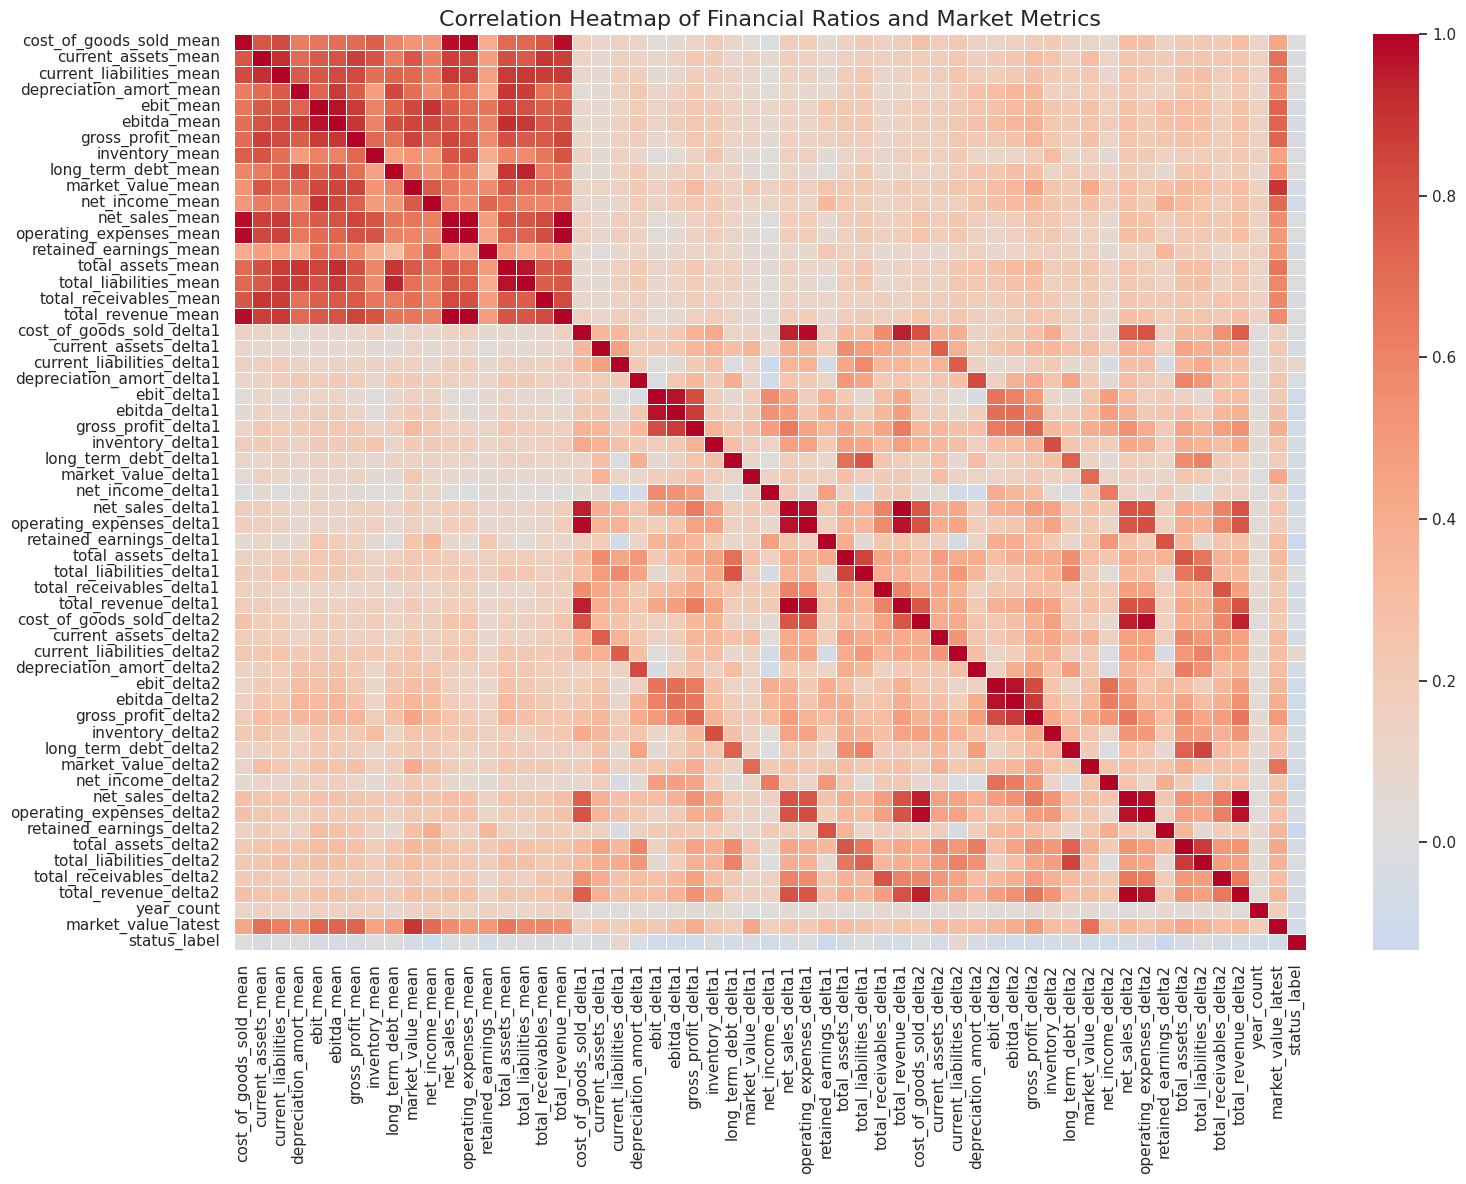

In [39]:
df4['status_label'] = df4['status_label'].map({'alive': 0, 'failed': 1})

corr_matrix = df4.drop(columns=['company_name']).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Correlation Heatmap of Financial Ratios and Market Metrics', fontsize=16)
plt.tight_layout()
plt.show()

In [40]:
df5['status_label'].value_counts()

status_label
0    6644
1     571
Name: count, dtype: int64

In [41]:
# oversampling the dataset to neutrralise class imbalance

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df5[df5['status_label'] == 0]
df_minority = df5[df5['status_label'] == 1]

# Oversample minority class to match majority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,             # sample with replacement
    n_samples=len(df_majority),  # match number in majority class
    random_state=42           # reproducibility
)

# Combine majority class with upsampled minority class
df5_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df6 = df5_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Optional: check the new class distribution
print(df6['status_label'].value_counts())


status_label
0    6644
1    6644
Name: count, dtype: int64


## FEATURE SELECTION

Correelation matrix to check for multicolinearity

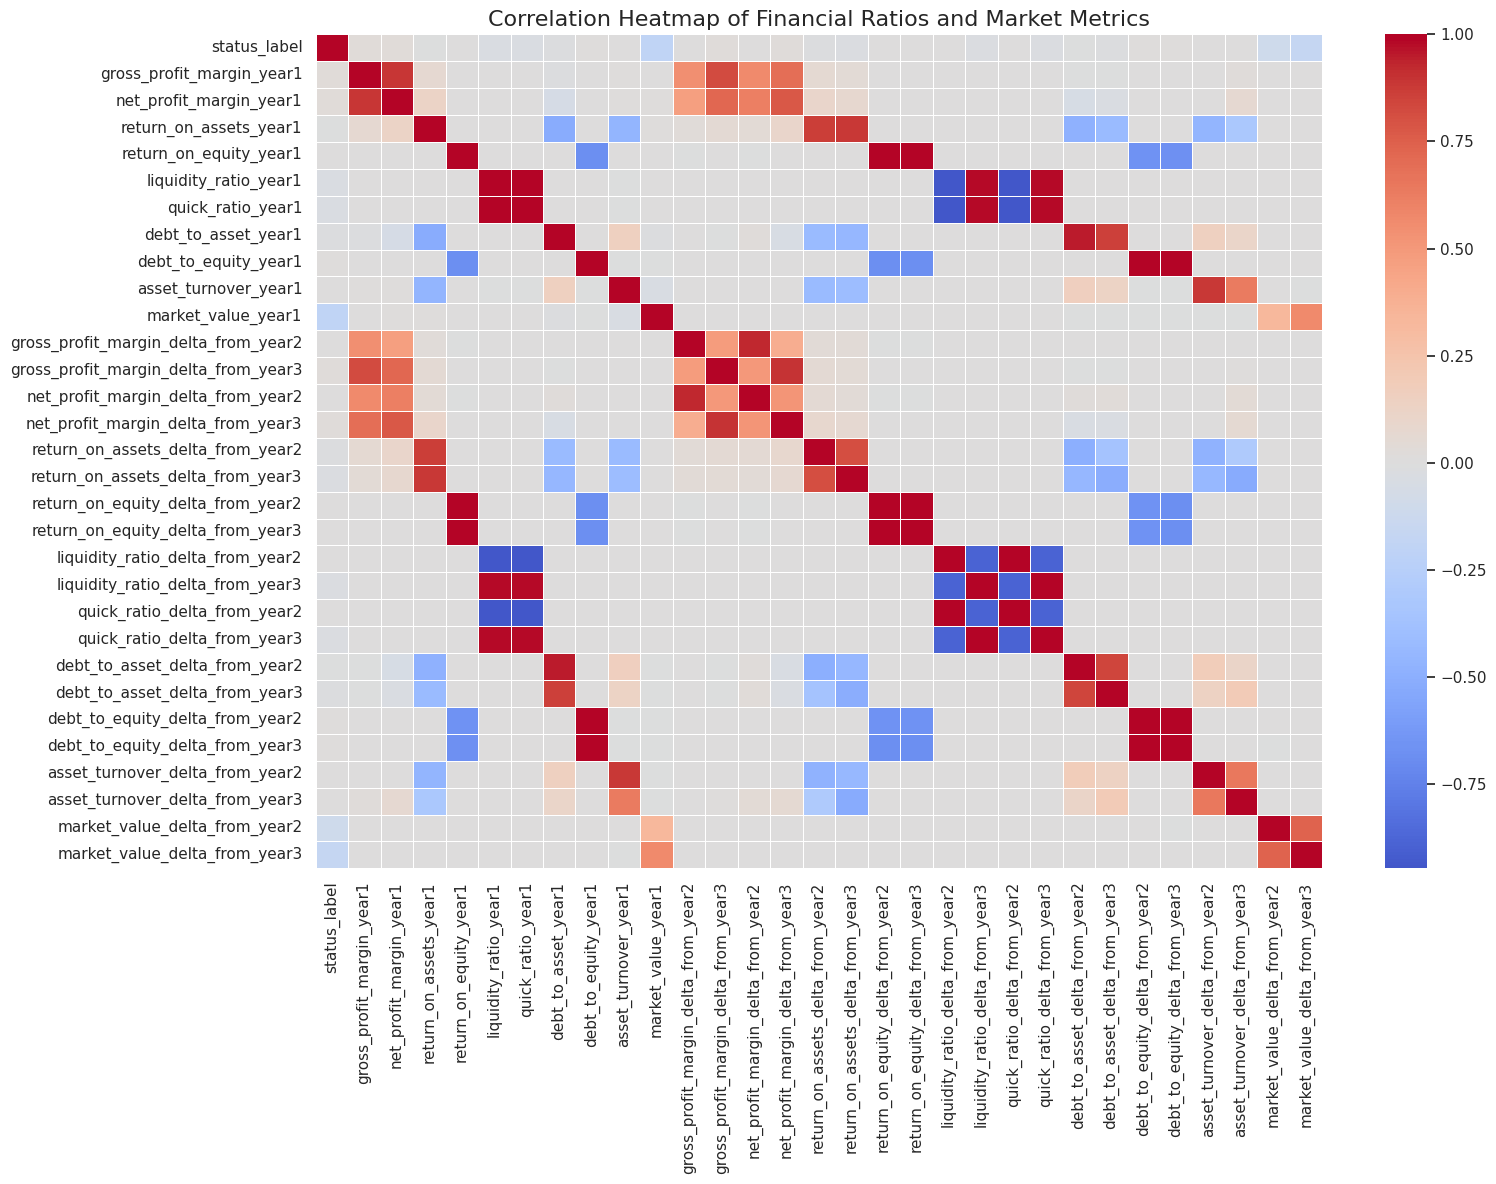

In [42]:


corr_matrix = df6.drop(columns=['company_name']).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Correlation Heatmap of Financial Ratios and Market Metrics', fontsize=16)
plt.tight_layout()
plt.show()


In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler


# Separate features and label
X = df6.drop(columns=['company_name', 'status_label'])
y = df6['status_label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top K features (adjust k as needed)
k = 20  # try different values based on your analysis
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:\n", selected_features.tolist())


Selected features:
 ['gross_profit_margin_year1', 'net_profit_margin_year1', 'liquidity_ratio_year1', 'quick_ratio_year1', 'debt_to_asset_year1', 'debt_to_equity_year1', 'asset_turnover_year1', 'market_value_year1', 'gross_profit_margin_delta_from_year3', 'net_profit_margin_delta_from_year3', 'return_on_assets_delta_from_year2', 'return_on_assets_delta_from_year3', 'liquidity_ratio_delta_from_year3', 'quick_ratio_delta_from_year3', 'debt_to_asset_delta_from_year2', 'debt_to_asset_delta_from_year3', 'debt_to_equity_delta_from_year2', 'debt_to_equity_delta_from_year3', 'market_value_delta_from_year2', 'market_value_delta_from_year3']


Liquidity ratio and quick ratio exhibit high correlation; therefore, one will be removed to avoid multicollinearity. Similarly, gross profit margin and net profit margin are strongly correlated, so one will be excluded.

Additionally, high correlations were observed between delta-from-year2 and delta-from-year3 features. Since the delta-from-year3 columns showed stronger predictive power in the feature selection step, the delta-from-year2 columns will be dropped for all the features.




In [44]:
# Drop specific individual columns
columns_to_drop = [
    'quick_ratio_year1',
    'gross_profit_margin_year1',
    'quick_ratio_delta_from_year3',
    'gross_profit_margin_delta_from_year3'
]

# Add all columns ending with '_delta_from_year2'
columns_to_drop += [col for col in df6.columns if col.endswith('_delta_from_year2')]

# Drop them from df5
df6 = df6.drop(columns=columns_to_drop)


In [45]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_name                        13288 non-null  object 
 1   status_label                        13288 non-null  int64  
 2   net_profit_margin_year1             13288 non-null  float64
 3   return_on_assets_year1              13288 non-null  float64
 4   return_on_equity_year1              13288 non-null  float64
 5   liquidity_ratio_year1               13288 non-null  float64
 6   debt_to_asset_year1                 13288 non-null  float64
 7   debt_to_equity_year1                13288 non-null  float64
 8   asset_turnover_year1                13288 non-null  float64
 9   market_value_year1                  13288 non-null  float64
 10  net_profit_margin_delta_from_year3  13288 non-null  float64
 11  return_on_assets_delta_from_year3   13288

# categorizing companies based on their imarket value

Small (1): Companies below the 25th percentile

Medium (2): Companies between the 25th and 75th percentiles

Large (3): Companies above the 75th percentile

In [46]:
df6['market_value_year1'].describe()

count    13288.000000
mean      1153.375864
std       4280.698459
min          0.000700
25%         11.247900
50%         51.886400
75%        343.893325
max      57972.096000
Name: market_value_year1, dtype: float64

In [47]:
	def classify_market_cap_numeric(value):
    if value < 11.25:
        return 1  # Small
    elif value <= 343.89:
        return 2  # Medium
    else:
        return 3  # Big

df6['market_cap_category'] = df6['market_value_year1'].apply(classify_market_cap_numeric)


In [48]:
df6['market_cap_category'].value_counts()

market_cap_category
2    6639
1    3327
3    3322
Name: count, dtype: int64

In [49]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_name                        13288 non-null  object 
 1   status_label                        13288 non-null  int64  
 2   net_profit_margin_year1             13288 non-null  float64
 3   return_on_assets_year1              13288 non-null  float64
 4   return_on_equity_year1              13288 non-null  float64
 5   liquidity_ratio_year1               13288 non-null  float64
 6   debt_to_asset_year1                 13288 non-null  float64
 7   debt_to_equity_year1                13288 non-null  float64
 8   asset_turnover_year1                13288 non-null  float64
 9   market_value_year1                  13288 non-null  float64
 10  net_profit_margin_delta_from_year3  13288 non-null  float64
 11  return_on_assets_delta_from_year3   13288

In [50]:
df7 = df6.copy()

df7


company_name  status_label  net_profit_margin_year1  \
0            C_384             0                 0.405160   
1           C_6626             1                -0.097861   
2           C_6133             0                 0.103268   
3           C_1462             0                -0.862815   
4           C_3483             0                 0.153642   
...            ...           ...                      ...   
13283       C_4018             1                -0.350785   
13284       C_7357             0                -0.008653   
13285       C_7574             0                 0.041441   
13286       C_2045             0                -0.023430   
13287       C_8473             1                -4.762832   

       return_on_assets_year1  return_on_equity_year1  liquidity_ratio_year1  \
0                    0.184999                0.256502               3.697807   
1                   -0.416923                1.854890               0.592888   
2                    0.047967                0.130765               0.575443   
3                   -0.341422               -6.289406               0.721819   
4                    0.065036               -0.229947               2.956858   
...                       ...                     ...                    ...   
13283               -0.367450               -4.066616               2.680084   
13284               -0.008781               -0.014600               2.234159   
13285                0.011500                0.062852               0.496663   
13286               -0.023821                0.155833               1.054729   
13287               -5.733156                1.323741               0.183835   

       debt_to_asset_year1  debt_to_equity_year1  asset_turnover_year1  \
0                 0.278760              0.386501              0.456609   
1                 1.224770             -5.449001              4.260340   
2                 0.633182              1.726149              0.464491   
3                 0.945715             17.421189              0.395708   
4                 1.282832             -4.535671              0.423298   
...                    ...                   ...                   ...   
13283             0.909642             10.067126              1.047508   
13284             0.398537              0.662613              1.014798   
13285             0.817032              4.465438              0.277500   
13286             1.152865             -7.541705              1.016724   
13287             5.331025             -1.230892              1.203728   

       market_value_year1  net_profit_margin_delta_from_year3  \
0                459.2251                            0.315332   
1                  0.3603                            0.015704   
2              23249.0250                            0.038012   
3                  0.2394                           -0.433793   
4               4481.7741                            0.096800   
...                   ...                                 ...   
13283             49.8689                            0.417092   
13284           1642.1709                           -0.065757   
13285            539.5547                           -0.075165   
13286            104.9689                            0.002134   
13287              3.6713                           -2.984485   

       return_on_assets_delta_from_year3  return_on_equity_delta_from_year3  \
0                               0.140530                           0.178389   
1                              -0.100890                           3.167069   
2                               0.018272                           0.051141   
3                               0.409180                          -6.415338   
4                               0.043567                          -0.129832   
...                                  ...                                ...   
13283                           0.182788                          -3.041060   
13284     

In [51]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_name                        13288 non-null  object 
 1   status_label                        13288 non-null  int64  
 2   net_profit_margin_year1             13288 non-null  float64
 3   return_on_assets_year1              13288 non-null  float64
 4   return_on_equity_year1              13288 non-null  float64
 5   liquidity_ratio_year1               13288 non-null  float64
 6   debt_to_asset_year1                 13288 non-null  float64
 7   debt_to_equity_year1                13288 non-null  float64
 8   asset_turnover_year1                13288 non-null  float64
 9   market_value_year1                  13288 non-null  float64
 10  net_profit_margin_delta_from_year3  13288 non-null  float64
 11  return_on_assets_delta_from_year3   13288

In [52]:
df7.drop(columns=['market_value_year1', 'company_name'], inplace=True)

In [53]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288 entries, 0 to 13287
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status_label                        13288 non-null  int64  
 1   net_profit_margin_year1             13288 non-null  float64
 2   return_on_assets_year1              13288 non-null  float64
 3   return_on_equity_year1              13288 non-null  float64
 4   liquidity_ratio_year1               13288 non-null  float64
 5   debt_to_asset_year1                 13288 non-null  float64
 6   debt_to_equity_year1                13288 non-null  float64
 7   asset_turnover_year1                13288 non-null  float64
 8   net_profit_margin_delta_from_year3  13288 non-null  float64
 9   return_on_assets_delta_from_year3   13288 non-null  float64
 10  return_on_equity_delta_from_year3   13288 non-null  float64
 11  liquidity_ratio_delta_from_year3    13288

In [54]:
#Split the data for modelling

y = df7['status_label']


X = df7.drop('status_label',axis=1)



In [55]:
#split dataset into training and testing datasetsa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# GridSearchCV with multiple scoring metrics
tree1 = GridSearchCV(
    estimator=tree,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='accuracy',  # This tells it which metric to use for best_model_
    return_train_score=True
)

In [57]:
%%time
tree1.fit(X_train,y_train)

CPU times: user 20.9 s, sys: 50.5 ms, total: 20.9 s
Wall time: 21.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [58]:
tree1.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [59]:
tree1.best_score_

np.float64(0.9482239191104025)

In [60]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [61]:
tree1_results_cv = make_results('decision tree cv',tree1,'auc')
tree1_results_cv

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.906504  0.999599  0.950767  0.948224  0.948367

## RANDOM FOREST

In [62]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Define hyperparameter grid
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [200]
}

# Define scoring metrics as a dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV
rf1 = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='recall',
    return_train_score=True,
    n_jobs=-1
)

In [63]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 40.6 s, sys: 3.38 s, total: 44 s
Wall time: 34min 29s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200]},
             refit='recall', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [66]:
import pickle
import os

def write_pickle(path, model_object, save_as: str):
    full_path = os.path.join(path, save_as + '.pickle')
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name: str):
    full_path = os.path.join(path, saved_model_name + '.pickle')
    with open(full_path, 'rb') as to_read:
        model = pickle.load(to_read)
    return model


In [67]:
path = '/content/drive/My Drive/Colab Notebooks/models'
os.makedirs(path, exist_ok=True)


In [68]:
write_pickle(path, rf1, 'bankruptcy_rf1')


In [69]:
rf1 = read_pickle(path, 'bankruptcy_rf1')


In [70]:
rf1.best_score_

np.float64(1.0)

In [71]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [72]:
rf1_results_cv = make_results('random forest cv', rf1, 'auc')
print(tree1_results_cv)
print(rf1_results_cv)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.906504  0.999599  0.950767  0.948224  0.948367
              model  precision  recall        F1  accuracy       auc
0  random forest cv    0.94701     1.0  0.972776  0.972005  0.999905


In [73]:
# Get scores on test data

preds = rf1.best_estimator_.predict(X_test)

In [74]:
from sklearn.metrics import roc_auc_score


def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    auc = roc_auc_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'auc': [auc]
                        })

    return table

In [75]:
results = pd.DataFrame()

rf_test_scores = get_test_scores('RF test', preds, y_test)

results = pd.concat([rf1_results_cv, rf_test_scores], axis=0).reset_index(drop=True)

results


model  precision    recall        F1  accuracy       auc
0  random forest cv   0.947010  1.000000  0.972776  0.972005  0.999905
1           RF test   0.952354  0.998796  0.975022  0.974413  0.974413

Random Forest model performs well on test data

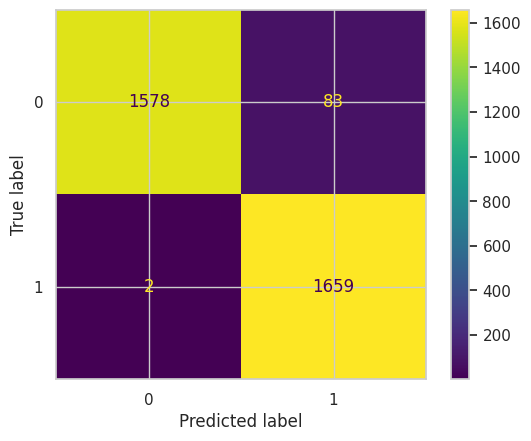

In [85]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_,
                             )
disp.plot(values_format='');

The confusion matrix shows that the model performed exceptionally well in classifying company outcomes. Out of the total predictions, it correctly identified 1,659 failed companies (true positives) and 1,578 non-failed companies (true negatives). There were only 2 cases where the model failed to detect actual failures (false negatives), and 88 instances where it incorrectly predicted failure for companies that actually survived (false positives). Overall, the model demonstrates high precision and recall, particularly in detecting failing companies, which is crucial for early financial risk identification.


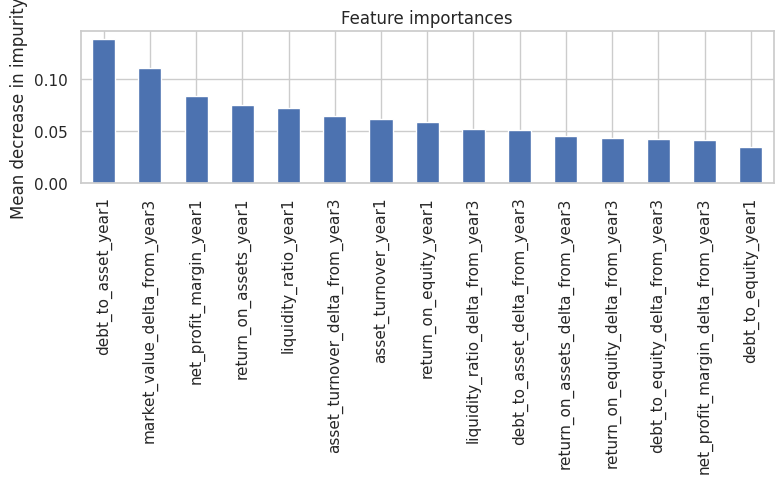

In [86]:
#Use the feature_importances_ attribute of the best estimator object to inspect the features of your final model.

importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

The above feature importance chart reveals which variables most influenced the model’s decision-making process. **Debt to asset ratio (year 1)** is the most critical predictor of company failure, indicating that companies with higher leverage are more likely to fail. This is followed by **market value delta from year 3**, suggesting that significant drops in market value over time are strong failure indicators. **Net profit margin** and **return on assets (year 1)** also show high importance, reinforcing that profitability and operational efficiency are key financial health markers. Features like **liquidity ratio**, **asset turnover**, and various delta-based metrics still contribute meaningfully, though to a lesser extent. Interestingly, **debt to equity (year 1)** and some delta features related to profit margins and equity changes have relatively low influence, suggesting they play a smaller role in predicting company outcomes in this dataset.


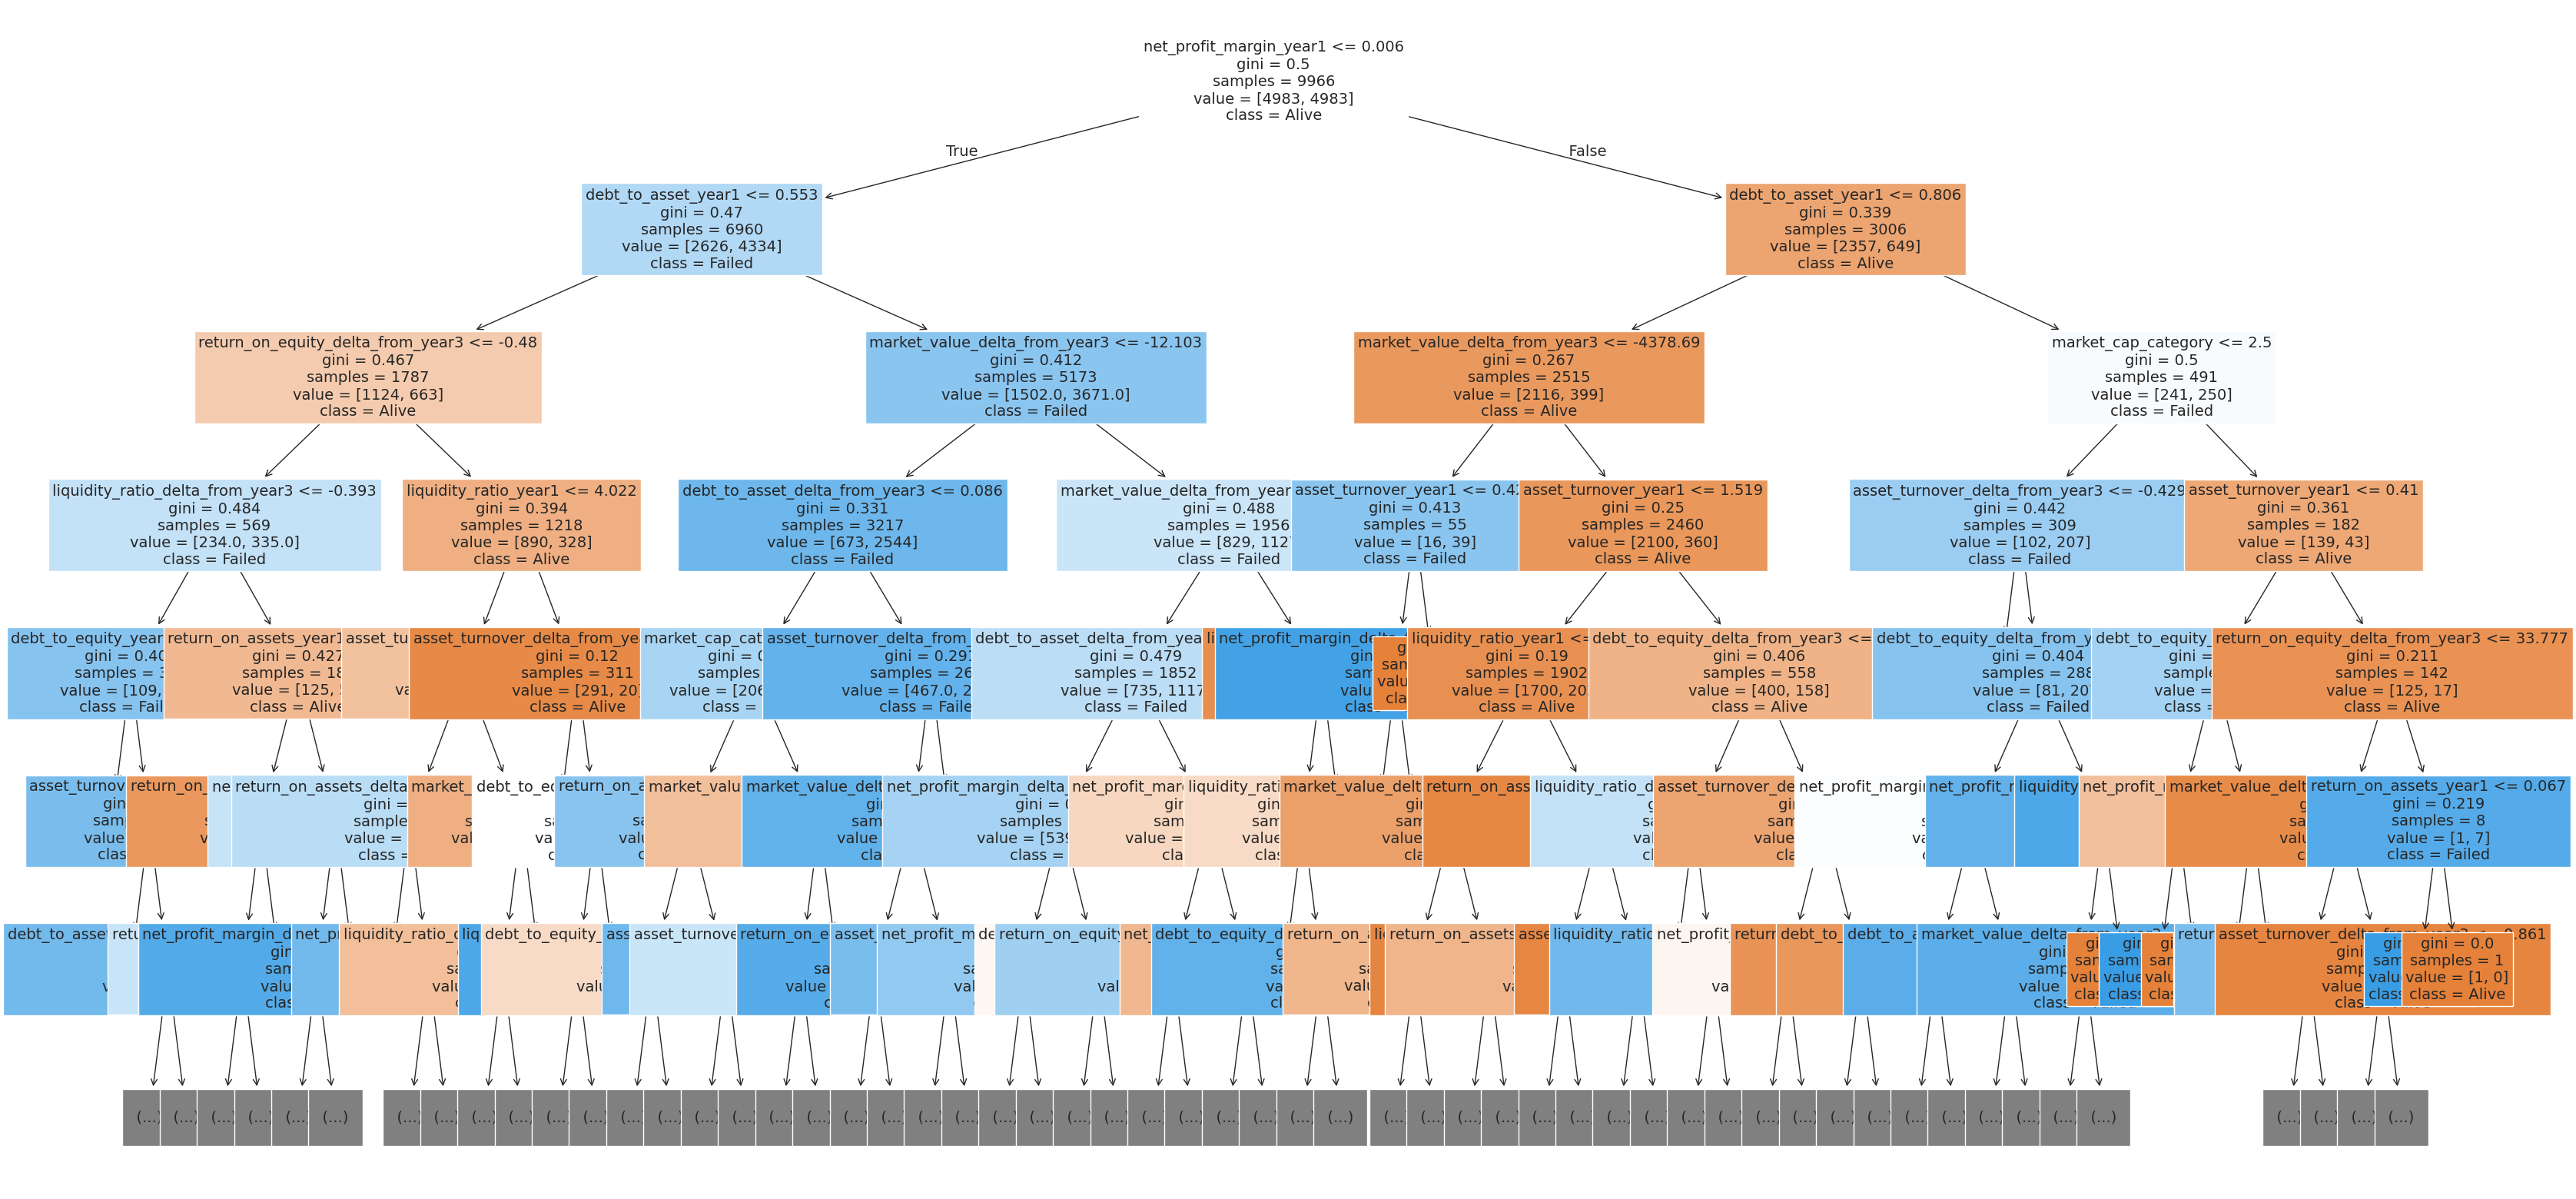

In [88]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(40,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'Alive', 1:'Failed'}, filled=True);
plt.show()

Recomendations

1. Implement stricter monitoring and early-warning systems for companies with leverage metrics above industry thresholds. Consider setting internal risk flags when debt-to-asset > 0.6
2.Track how metrics perform over time.  Declines in key metrics over time (like profitability, liquidity, or market value) are strong indicators of deteriorating financial health.
3. Exhibit caution with small declining firms.
4. Operational efficiency should me tracked continuously. Net profit margin, gross profit margin and return on assets are good indicators of operational efficiency.